In [1]:
#`##### import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.decomposition import PCA
import random as rd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
import sys
import PeakDetective
import PeakDetective.detection_helper as detection_helper
import scipy.stats as stats
import seaborn as sb
import sklearn.metrics as met
import random as rd
import importlib
import pickle as pkl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib_venn import venn2


In [2]:
datadir = "D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/"
resolution = 60
window = 1.0

In [3]:
#covid_plasma_hamster
ms1ppm = 50
peakWidth = (10,93)
s2n = 9.1
noise = 100
mzDiff = 0.0045
prefilter = 3
cutoff=0.8

In [4]:
det = detection_helper.PeakList()
#det.runXCMS(datadir, "xcms_peak_list.csv", "negative", ms1ppm, peakWidth,s2n=s2n,noise=noise,mzDiff=mzDiff,prefilter=prefilter)
det.readXCMSPeakList(datadir+"xcms_peak_list.csv")
peakList = pd.DataFrame(det.peakList)
peakList

,mz,rt,rt_start,rt_end,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,...,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
FT0001,52.979938,5.065533,4.959100,5.148091,0.000000,0.000000,0.00000,150837.234745,194413.486705,182357.676981,...,2419.482741,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386
FT0002,52.979845,4.829960,4.693100,4.865565,0.000000,930.129534,0.00000,55655.981332,63525.648336,49132.620413,...,109236.614651,84843.231735,22774.304380,64173.831871,100585.428765,63480.555059,62156.151168,84918.766147,89546.492561,92590.937847
FT0003,52.979639,1.756369,1.674209,1.810926,10837.656774,9208.201589,12363.55156,11387.833288,8725.272745,9047.622786,...,8375.259893,8291.012390,10633.587115,7078.631853,7309.740413,6751.376184,9682.674564,11268.998269,9743.546611,5944.375184
FT0004,54.976962,5.079406,5.032442,5.131516,0.000000,0.000000,0.00000,74036.348212,41823.759345,51858.992980,...,49015.141344,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720
FT0005,54.977004,4.967265,4.884650,4.992359,339.382945,317.488548,0.00000,69324.270557,30759.487873,68950.167360,...,89538.583851,41074.662200,68834.907446,68240.561387,70451.410203,62088.814024,61248.727906,72242.389613,74849.131179,75693.880596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,1696.074555,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,1316.403455,0.000000,0.000000,...,4058.218594,3856.990736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,611.279493,936.082754
FT8294,1697.082626,0.760141,0.753100,0.767181,0.000000,0.000000,0.00000,2366.984688,0.000000,0.000000,...,4407.592237,3625.982775,0.000000,0.000000,0.000000,612.094990,0.000000,1241.825246,818.126266,1252.142480
FT8295,1698.089255,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,3290.152508,4272.630885,0.000000,0.000000,0.000000,0.000000,0.000000,536.399392,614.059340,697.266852
FT8296,1699.086468,0.767181,0.767181,0.767181,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,2929.793620,1291.343466,0.000000,0.000000,0.000000,0.000000,0.000000,719.981859,0.000000,0.000000


In [5]:
files = [x for x in os.listdir(datadir) if ".mzML" in x]
files.reverse()
print(files)
raw_data = []
for file in files:
    temp = PeakDetective.rawData()
    temp.readRawDataFile(datadir + file,ms1ppm)
    raw_data.append(temp)


['QC-P pool-4_6540.mzML', 'QC-P pool-3_6540.mzML', 'QC-P pool-2_6540.mzML', 'P H-514_6540.mzML', 'P H-507_6540.mzML', 'P H-488_6540.mzML', 'P H-487_6540.mzML', 'P H-482_6540.mzML', 'P H-480_6540.mzML', 'P H-476_6540.mzML', 'P H-472_6540.mzML', 'P H-471_6540.mzML', 'P H-469 -2 _6540.mzML', 'P H-464_6540.mzML', 'blank-3_6540.mzML', 'blank-2_6540.mzML', 'blank-1_6540.mzML']


In [6]:
integ = PeakDetective.PeakDetective(numCores = 20,resolution=resolution)

In [8]:
if __name__ == "__main__":
    rts = peakList["rt"].values
    X = integ.makeDataMatrix(raw_data[:2],peakList["mz"],rts,align=True)

forming matrix |██████████████████████████████████████████████████| 100.0% 
aligning EICs |██████████████████████████████████████████████████| 100.0% 


In [9]:
#if __name__ == "__main__":
#    X_signal = integ.generateSignalPeaks(peakList,raw_data[:1],n=100)
#    X_noise = integ.generateFalsePeaks(peakList,raw_data[:1],n=100)
#    X_syn = np.concatenate((X_signal,X_noise),axis=0)
#    y_syn = np.array([[0.0,1.0] for _ in X_signal] + [[1.0,0.0] for _ in X_noise])

In [10]:
pkl.dump([X],open(datadir + "model_selection_data.pkl","wb"))

In [7]:
[X] = pkl.load(open(datadir + "model_selection_data.pkl","rb"))

In [ ]:
if __name__ == "__main__":
    integ.trainSmoother(peakList,raw_data,100000,10,64,0.1)

In [15]:
integ.save(datadir + "smoothed_only/")

In [8]:
integ.load(datadir + "smoothed_only/")

1/1 [==============================] - 0s 29ms/step
loss: 0.430372029542923 mean_absolute_error: 0.23898868262767792 val loss: 0.5092035531997681 val_mean_absolute_error: 0.23723824322223663 numEpochs: 204
515/515 [==============================] - 1s 1ms/step


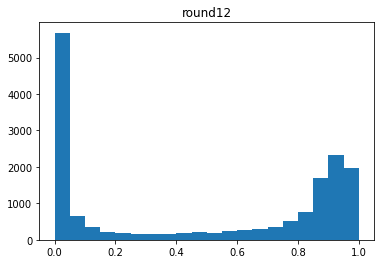

16464 unclassified features remaining
Continue with another iteration? (1=Yes, 0=No): 


 0


1/1 [==============================] - 0s 25ms/step


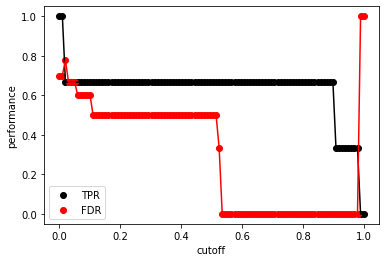

In [9]:
if __name__ == "__main__":
    integ.trainClassifierActive(X,[],[],200,1000,4,1,numVal = 10,numManualPerRound=10,inJupyter=True)

In [9]:
cutoff=0.8

In [11]:
integ.save(datadir + "active/")

In [8]:
integ.load(datadir + "active/")

In [9]:
if __name__ == "__main__":
    peak_curated,peak_scores,peak_intensities = integ.curatePeaks(raw_data,peakList,threshold=cutoff,align=True)
    peak_curated

generating EICs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
aligning EICs |██████████████████████████████████████████████████| 100.0% 
4408/4408 [==============================] - 6s 1ms/step
integrating peaks...
integrating peaks |██████████████████████████████████████████████████| 100.0% 


In [10]:
peak_curated.to_csv(datadir + "peak_curated.csv")
peak_scores.to_csv(datadir + "peak_scores.csv")
peak_intensities.to_csv(datadir + "peak_intensities.csv")

In [11]:
peak_curated = pd.read_csv(datadir + "peak_curated.csv",index_col=0)
peak_scores = pd.read_csv(datadir + "peak_scores.csv",index_col=0)
peak_intensities = pd.read_csv(datadir + "peak_intensities.csv",index_col=0)

In [12]:
peak_curated

,mz,rt,rt_start,rt_end,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,...,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML
FT0001,52.979938,5.065533,4.959100,5.148091,0.000000,0.000000,0.00000,150837.234745,194413.486705,182357.676981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
FT0002,52.979845,4.829960,4.693100,4.865565,0.000000,930.129534,0.00000,55655.981332,63525.648336,49132.620413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FT0003,52.979639,1.756369,1.674209,1.810926,10837.656774,9208.201589,12363.55156,11387.833288,8725.272745,9047.622786,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
FT0004,54.976962,5.079406,5.032442,5.131516,0.000000,0.000000,0.00000,74036.348212,41823.759345,51858.992980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
FT0005,54.977004,4.967265,4.884650,4.992359,339.382945,317.488548,0.00000,69324.270557,30759.487873,68950.167360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,1696.074555,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,1316.403455,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
FT8294,1697.082626,0.760141,0.753100,0.767181,0.000000,0.000000,0.00000,2366.984688,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
FT8295,1698.089255,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
FT8296,1699.086468,0.767181,0.767181,0.767181,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
y = integ.classifyMatrix(X)

519/519 [==============================] - 1s 1ms/step


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


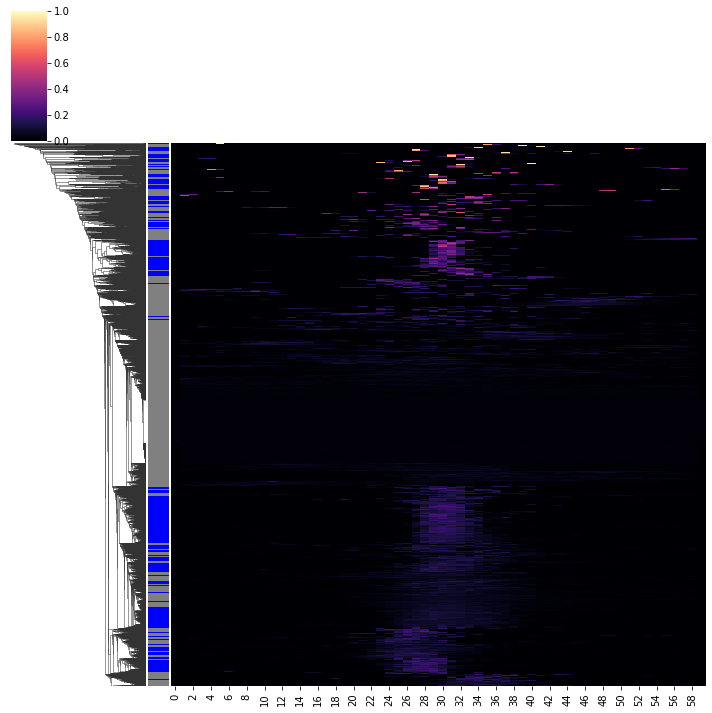

In [14]:
def tmp(val):
    if val > cutoff:
        return "blue"
    return "grey"
row_colors = [tmp(x) for x in y[:len(peakList),1]]
sb.clustermap(PeakDetective.normalizeMatrix(X[:len(peakList)]),col_cluster=False,yticklabels=False,cmap="magma",vmin=0.0,vmax=1.0,row_colors=row_colors)

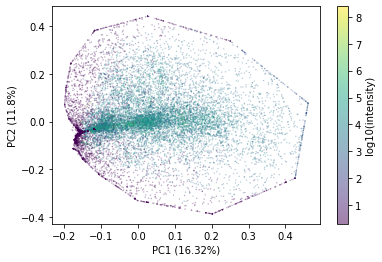

In [15]:
pca = PCA(2)
loads = pca.fit_transform(PeakDetective.normalizeMatrix(X))
plt.scatter(loads[:,0],loads[:,1],c=np.log10(np.array([np.max([2, PeakDetective.integratePeak(x)]) for x in X])),s=.1,alpha=.5)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
#plt.xlim((-.5,.5))
plt.colorbar(label="log10(intensity)")

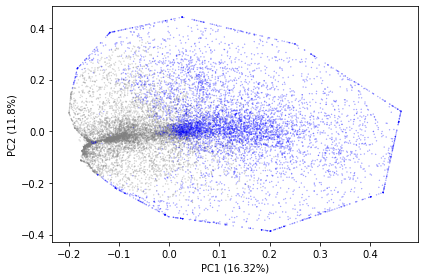

In [16]:
pca = PCA(2)
loads = pca.fit_transform(PeakDetective.normalizeMatrix(X))
colormap = LinearSegmentedColormap.from_list("test",colors=["grey", "blue"],N=256)
def getColor(v):
    if v > cutoff:
        return "blue"
    else:
        return "grey"
colors = [getColor(x) for x in y[:,1]]
#plt.scatter(loads[:,0],loads[:,1],c=y[:,1],s=.1,alpha=.5,cmap=colormap)
plt.scatter(loads[:,0],loads[:,1],c=colors,s=.1,alpha=.5)

plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
#plt.xlim((-.5,.5))

#plt.colorbar(label="PeakDetective Score")
plt.tight_layout()
plt.savefig(datadir + "pca_pd.png",dpi=300)

Text(0, 0.5, '% of features')

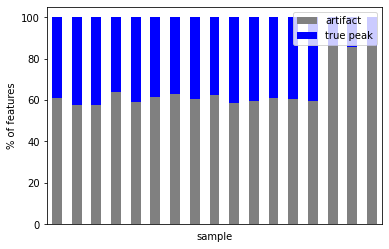

In [17]:
df = {}
for file in files:
    for index,row in peak_curated.iterrows():
        if row[datadir + file] > cutoff:
            df[len(df)] = {"sample":file,"classification":"true peak"}
        else:
            df[len(df)] = {"sample":file,"classification":"artifact"}

df = pd.DataFrame.from_dict(df,orient="index")

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf


aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["grey","blue"])
plt.xticks([],[])
plt.ylabel("% of features")

In [18]:
xcmsCols = [x for x in peakList.columns.values if ".mzML" in x and "D:" not in x]
xcms_peak_areas = peakList[xcmsCols]
xcms_peak_areas

,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,P H-472_6540.mzML,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
FT0001,0.000000,0.000000,0.00000,150837.234745,194413.486705,182357.676981,2486.967242,2419.482741,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386
FT0002,0.000000,930.129534,0.00000,55655.981332,63525.648336,49132.620413,85895.599533,109236.614651,84843.231735,22774.304380,64173.831871,100585.428765,63480.555059,62156.151168,84918.766147,89546.492561,92590.937847
FT0003,10837.656774,9208.201589,12363.55156,11387.833288,8725.272745,9047.622786,5899.952212,8375.259893,8291.012390,10633.587115,7078.631853,7309.740413,6751.376184,9682.674564,11268.998269,9743.546611,5944.375184
FT0004,0.000000,0.000000,0.00000,74036.348212,41823.759345,51858.992980,36614.956408,49015.141344,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720
FT0005,339.382945,317.488548,0.00000,69324.270557,30759.487873,68950.167360,78110.782799,89538.583851,41074.662200,68834.907446,68240.561387,70451.410203,62088.814024,61248.727906,72242.389613,74849.131179,75693.880596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,0.000000,0.000000,0.00000,1316.403455,0.000000,0.000000,1717.980596,4058.218594,3856.990736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,611.279493,936.082754
FT8294,0.000000,0.000000,0.00000,2366.984688,0.000000,0.000000,1998.236755,4407.592237,3625.982775,0.000000,0.000000,0.000000,612.094990,0.000000,1241.825246,818.126266,1252.142480
FT8295,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1508.581696,3290.152508,4272.630885,0.000000,0.000000,0.000000,0.000000,0.000000,536.399392,614.059340,697.266852
FT8296,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2929.793620,1291.343466,0.000000,0.000000,0.000000,0.000000,0.000000,719.981859,0.000000,0.000000


In [19]:
pdCols = [x for x in peak_intensities.columns.values if ".mzML" in x and "D:" in x]
pd_peak_areas = peak_intensities[pdCols]
pd_peak_areas

,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML
FT0001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FT0002,199260.244049,176691.110329,169735.339047,160264.877509,171140.336834,188084.082483,163958.066202,159775.160454,177786.415982,216646.727479,172170.157968,186354.127664,168537.817941,176925.185522,1273.808725,1429.174826,366.502897
FT0003,6042.137215,5511.689111,8118.874756,5887.192801,5235.630726,6383.918801,6640.271303,7854.044876,7090.022841,5666.171735,6383.466951,6504.101065,7227.194120,7429.258504,6934.021471,7190.976239,7709.595265
FT0004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FT0005,66117.834668,59847.053678,63519.963725,54287.966383,56101.774695,63472.008468,60547.078054,58216.600883,63670.100195,80117.214694,70690.919194,67674.880652,60804.268012,63783.693233,0.000000,309.353945,698.892329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FT8294,1085.833077,1051.527905,2082.383129,0.000000,790.612782,0.000000,0.000000,0.000000,3340.759181,3290.514330,2358.765129,0.000000,0.000000,2588.241062,0.000000,0.000000,0.000000
FT8295,489.029229,632.801443,253.294389,0.000000,0.000000,0.000000,0.000000,0.000000,2019.421199,1707.258115,1006.258737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FT8296,0.000000,350.898172,753.010540,0.000000,0.000000,0.000000,0.000000,0.000000,2659.881950,2366.965176,927.946488,0.000000,0.000000,308.612948,0.000000,0.000000,0.000000


(0.7611401907198051, 0.0)

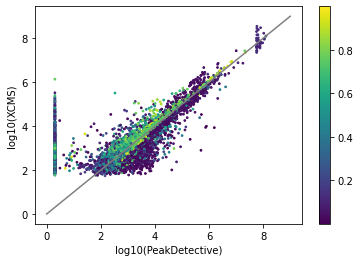

In [20]:
plt.scatter(np.log10(pd_peak_areas.values.mean(axis=1)+2),np.log10(xcms_peak_areas.values.mean(axis=1)+2),s=3,c=peak_scores[pdCols].values.mean(axis=1))
plt.plot([0,9],[0,9],color="grey")
plt.xlabel("log10(PeakDetective)")
plt.ylabel("log10(XCMS)")
plt.colorbar()
stats.pearsonr(pd_peak_areas.values.mean(axis=1),xcms_peak_areas.values.mean(axis=1))

In [21]:
if __name__ == "__main__":
    peak_scores_pd_det, peak_intensities_pd_det,rois = integ.detectPeaks(raw_data, cutoff=cutoff, intensityCutoff = 500,numDataPoints=3,window=0.1,align=True,detectFrac=0.5)

Detecting ROIs |█████████████████████████████████████████████████-| 100.0% 8320 ROIs found
8192  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
aligning EICs |██████████████████████████████████████████████████| 100.0% 
30638080 EICs constructed for evaluation
28604/28604 [==============================] - 33s 1ms/step
done
4960  peaks found
integrating peaks...
integrating peaks |██████████████████████████████████████████████████| 100.0% 


In [56]:
peak_scores_pd_det

,index,mz,rt,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML
0,666,56.995481,0.665767,0.869961,0.885974,0.875036,0.876605,0.872787,0.878942,0.799624,0.891653,0.868804,0.846540,0.873630,0.872076,0.874232,0.877716,0.871832,0.869944,0.000000
1,886,56.996561,0.665767,0.869961,0.885974,0.875036,0.876909,0.872787,0.878942,0.799624,0.891653,0.868804,0.836798,0.873630,0.872076,0.874232,0.877716,0.871832,0.869944,0.000000
2,1106,56.997973,0.665767,0.820445,0.768079,0.686066,0.843582,0.819037,0.717306,0.870021,0.883434,0.815453,0.865823,0.861056,0.792773,0.854409,0.841636,0.851276,0.722521,0.000000
3,2209,57.066443,0.965767,0.873742,0.864984,0.875093,0.878459,0.886874,0.894497,0.877051,0.898474,0.850385,0.870490,0.872447,0.852434,0.844966,0.868162,0.838055,0.878197,0.935509
4,2436,57.975586,1.665767,0.944253,0.944544,0.945989,0.934622,0.940880,0.944558,0.944529,0.942786,0.948019,0.945840,0.945673,0.945026,0.946140,0.943081,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,1798728,1678.154011,0.865767,0.000000,0.969679,0.977899,0.000000,0.974458,0.982986,0.992945,0.981169,0.974563,0.982138,0.981596,0.964404,0.984678,0.969487,0.000000,0.982270,0.000000
4956,1798948,1680.172695,0.865767,0.000000,0.942982,0.953755,0.955577,0.934373,0.953751,0.953983,0.000000,0.000000,0.956753,0.000000,0.929982,0.956855,0.935576,0.000000,0.000000,0.000000
4957,1800108,1687.126589,6.865767,0.925928,0.937709,0.946824,0.927884,0.943900,0.950849,0.943555,0.954397,0.000000,0.000000,0.000000,0.935217,0.950533,0.965978,0.000000,0.000000,0.914195
4958,1801587,1697.084301,0.765767,0.970383,0.985471,0.978543,0.971675,0.985419,0.000000,0.000000,0.000000,0.985704,0.983333,0.982778,0.000000,0.000000,0.989292,0.989594,0.000000,0.000000


In [57]:
peak_intensities_pd_det

,mz,rt,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML
0,56.995481,0.665767,12979.038879,10860.098616,11665.419895,13528.075039,11619.255832,12091.765780,10133.561957,11619.984401,11996.769927,10987.724117,12902.688011,11612.254176,12437.694045,11183.565314,7043.442338,8211.070991,3521.721169
1,56.996561,0.665767,12979.038879,10860.098616,11665.419895,13528.075039,11619.255832,12091.765780,10133.561957,11619.984401,11996.769927,10987.724117,12902.688011,11612.254176,12437.694045,11183.565314,7043.442338,8211.070991,3521.721169
2,56.997973,0.665767,3712.766605,4486.372245,2642.037913,3665.334071,3739.795206,3790.605392,3675.587585,2947.877723,3593.807648,3568.411782,4511.029516,3719.890257,3978.675981,3099.090295,1640.115258,383.797356,191.898678
3,57.066443,0.965767,4105.577864,4014.010176,3443.829007,4536.922505,4180.381368,4286.547115,3702.380798,2969.285748,3028.075646,3377.610915,3357.642243,2811.823983,3722.028738,3003.618662,2470.704167,1637.215124,1779.112640
4,57.975586,1.665767,194212.774283,201194.743525,201317.011225,127355.221900,116607.917261,183404.658988,146206.907108,181494.255758,247586.530361,187051.379157,208213.119646,223996.925381,234234.429419,160430.902646,314.364268,932.510203,516.677230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,1678.154011,0.865767,1001.391535,1315.117256,1884.850403,614.269259,1168.443648,2011.199022,2343.581246,1430.137185,543.859893,1473.228141,1612.486279,1260.597059,1580.594980,1622.368510,334.003749,661.134987,167.001875
4956,1680.172695,0.865767,916.862353,1680.158197,1903.729704,1790.028374,1402.953471,4598.724482,1719.520104,825.505441,642.579311,939.003438,304.546306,1254.602161,1745.313839,1178.540086,270.492363,304.984257,169.288696
4957,1687.126589,6.865767,962.219032,1103.457870,1291.264683,1919.711223,1978.082624,1895.205942,2445.034385,925.619373,208.718056,200.094583,462.509720,1736.219645,2088.449956,1571.498424,163.009291,78.833232,566.309302
4958,1697.084301,0.765767,1074.295744,992.460445,1943.649644,590.593591,730.022184,538.032559,449.247221,327.056331,3133.417393,3471.957940,2466.749157,390.045100,361.472554,1715.833985,851.977538,423.629056,163.528165


In [58]:
peak_intensities_pd_det.to_csv(datadir + "peak_intensities_pd_det.csv")
peak_scores_pd_det.to_csv(datadir + "peak_scores_pd_det.csv")
pkl.dump(rois,open(datadir+"rois.pkl","wb"))

In [59]:
peak_intensities_pd_det = pd.read_csv(datadir + "peak_intensities_pd_det.csv",index_col=0) 
peak_scores_pd_det = pd.read_csv(datadir + "peak_scores_pd_det.csv",index_col=0)
rois = pkl.load(open(datadir+"rois.pkl","rb"))

In [60]:
pdCols = [x for x in peak_intensities_pd_det.columns.values if ".mzML" in x and "D:" in x]# and "lank" not in x]
pdCols

['D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML',
 'D:/PeakDetective/data/hamster_pla

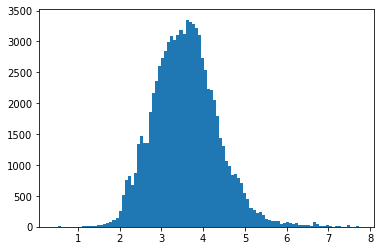

In [61]:
plt.hist(np.log10(peak_intensities_pd_det[pdCols].values.flatten()+2),bins=100)
pass

In [62]:
pd_peak_list = detection_helper.PeakList()
pd_peak_list.from_df(peak_intensities_pd_det,pdCols)
pd_peak_list.peakList

,mz,rt,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML
0,56.995481,0.665767,12979.038879,10860.098616,11665.419895,13528.075039,11619.255832,12091.765780,10133.561957,11619.984401,11996.769927,10987.724117,12902.688011,11612.254176,12437.694045,11183.565314,7043.442338,8211.070991,3521.721169
1,56.996561,0.665767,12979.038879,10860.098616,11665.419895,13528.075039,11619.255832,12091.765780,10133.561957,11619.984401,11996.769927,10987.724117,12902.688011,11612.254176,12437.694045,11183.565314,7043.442338,8211.070991,3521.721169
2,56.997973,0.665767,3712.766605,4486.372245,2642.037913,3665.334071,3739.795206,3790.605392,3675.587585,2947.877723,3593.807648,3568.411782,4511.029516,3719.890257,3978.675981,3099.090295,1640.115258,383.797356,191.898678
3,57.066443,0.965767,4105.577864,4014.010176,3443.829007,4536.922505,4180.381368,4286.547115,3702.380798,2969.285748,3028.075646,3377.610915,3357.642243,2811.823983,3722.028738,3003.618662,2470.704167,1637.215124,1779.112640
4,57.975586,1.665767,194212.774283,201194.743525,201317.011225,127355.221900,116607.917261,183404.658988,146206.907108,181494.255758,247586.530361,187051.379157,208213.119646,223996.925381,234234.429419,160430.902646,314.364268,932.510203,516.677230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,1678.154011,0.865767,1001.391535,1315.117256,1884.850403,614.269259,1168.443648,2011.199022,2343.581246,1430.137185,543.859893,1473.228141,1612.486279,1260.597059,1580.594980,1622.368510,334.003749,661.134987,167.001875
4956,1680.172695,0.865767,916.862353,1680.158197,1903.729704,1790.028374,1402.953471,4598.724482,1719.520104,825.505441,642.579311,939.003438,304.546306,1254.602161,1745.313839,1178.540086,270.492363,304.984257,169.288696
4957,1687.126589,6.865767,962.219032,1103.457870,1291.264683,1919.711223,1978.082624,1895.205942,2445.034385,925.619373,208.718056,200.094583,462.509720,1736.219645,2088.449956,1571.498424,163.009291,78.833232,566.309302
4958,1697.084301,0.765767,1074.295744,992.460445,1943.649644,590.593591,730.022184,538.032559,449.247221,327.056331,3133.417393,3471.957940,2466.749157,390.045100,361.472554,1715.833985,851.977538,423.629056,163.528165


In [63]:
pd_peak_list.imputeRowMin(pdCols)

0.0 of values imputted


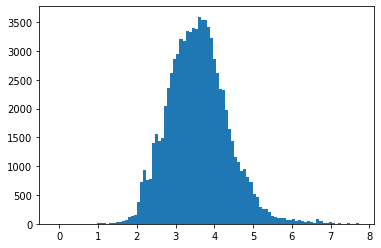

In [64]:
plt.hist(np.log10(pd_peak_list.peakList[pdCols].values.flatten()),bins=100)
pass

In [65]:
## pd_peak_list 
pd_peak_list.peakList

,mz,rt,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML
0,56.995481,0.665767,12979.038879,10860.098616,11665.419895,13528.075039,11619.255832,12091.765780,10133.561957,11619.984401,11996.769927,10987.724117,12902.688011,11612.254176,12437.694045,11183.565314,7043.442338,8211.070991,3521.721169
1,56.996561,0.665767,12979.038879,10860.098616,11665.419895,13528.075039,11619.255832,12091.765780,10133.561957,11619.984401,11996.769927,10987.724117,12902.688011,11612.254176,12437.694045,11183.565314,7043.442338,8211.070991,3521.721169
2,56.997973,0.665767,3712.766605,4486.372245,2642.037913,3665.334071,3739.795206,3790.605392,3675.587585,2947.877723,3593.807648,3568.411782,4511.029516,3719.890257,3978.675981,3099.090295,1640.115258,383.797356,191.898678
3,57.066443,0.965767,4105.577864,4014.010176,3443.829007,4536.922505,4180.381368,4286.547115,3702.380798,2969.285748,3028.075646,3377.610915,3357.642243,2811.823983,3722.028738,3003.618662,2470.704167,1637.215124,1779.112640
4,57.975586,1.665767,194212.774283,201194.743525,201317.011225,127355.221900,116607.917261,183404.658988,146206.907108,181494.255758,247586.530361,187051.379157,208213.119646,223996.925381,234234.429419,160430.902646,314.364268,932.510203,516.677230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,1678.154011,0.865767,1001.391535,1315.117256,1884.850403,614.269259,1168.443648,2011.199022,2343.581246,1430.137185,543.859893,1473.228141,1612.486279,1260.597059,1580.594980,1622.368510,334.003749,661.134987,167.001875
4956,1680.172695,0.865767,916.862353,1680.158197,1903.729704,1790.028374,1402.953471,4598.724482,1719.520104,825.505441,642.579311,939.003438,304.546306,1254.602161,1745.313839,1178.540086,270.492363,304.984257,169.288696
4957,1687.126589,6.865767,962.219032,1103.457870,1291.264683,1919.711223,1978.082624,1895.205942,2445.034385,925.619373,208.718056,200.094583,462.509720,1736.219645,2088.449956,1571.498424,163.009291,78.833232,566.309302
4958,1697.084301,0.765767,1074.295744,992.460445,1943.649644,590.593591,730.022184,538.032559,449.247221,327.056331,3133.417393,3471.957940,2466.749157,390.045100,361.472554,1715.833985,851.977538,423.629056,163.528165


In [66]:
det = detection_helper.PeakList()
det.readXCMSPeakList(datadir+"xcms_peak_list.csv")
det.peakList

,mz,rt,rt_start,rt_end,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,...,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
FT0001,52.979938,5.065533,4.959100,5.148091,0.000000,0.000000,0.00000,150837.234745,194413.486705,182357.676981,...,2419.482741,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386
FT0002,52.979845,4.829960,4.693100,4.865565,0.000000,930.129534,0.00000,55655.981332,63525.648336,49132.620413,...,109236.614651,84843.231735,22774.304380,64173.831871,100585.428765,63480.555059,62156.151168,84918.766147,89546.492561,92590.937847
FT0003,52.979639,1.756369,1.674209,1.810926,10837.656774,9208.201589,12363.55156,11387.833288,8725.272745,9047.622786,...,8375.259893,8291.012390,10633.587115,7078.631853,7309.740413,6751.376184,9682.674564,11268.998269,9743.546611,5944.375184
FT0004,54.976962,5.079406,5.032442,5.131516,0.000000,0.000000,0.00000,74036.348212,41823.759345,51858.992980,...,49015.141344,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720
FT0005,54.977004,4.967265,4.884650,4.992359,339.382945,317.488548,0.00000,69324.270557,30759.487873,68950.167360,...,89538.583851,41074.662200,68834.907446,68240.561387,70451.410203,62088.814024,61248.727906,72242.389613,74849.131179,75693.880596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,1696.074555,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,1316.403455,0.000000,0.000000,...,4058.218594,3856.990736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,611.279493,936.082754
FT8294,1697.082626,0.760141,0.753100,0.767181,0.000000,0.000000,0.00000,2366.984688,0.000000,0.000000,...,4407.592237,3625.982775,0.000000,0.000000,0.000000,612.094990,0.000000,1241.825246,818.126266,1252.142480
FT8295,1698.089255,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,3290.152508,4272.630885,0.000000,0.000000,0.000000,0.000000,0.000000,536.399392,614.059340,697.266852
FT8296,1699.086468,0.767181,0.767181,0.767181,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,2929.793620,1291.343466,0.000000,0.000000,0.000000,0.000000,0.000000,719.981859,0.000000,0.000000


In [67]:
research_samps = [x for x in peak_scores.columns.values if "D:" in x]
toDrop = []
rois.sort()
for index,row in det.peakList.iterrows():
    if np.sum(peak_scores.loc[index,research_samps].values > cutoff) < float(len(research_samps)/2):# or np.sum(peak_intensities.loc[index,research_samps].values < 1000) < len(research_samps)/2 :
        toDrop.append(index)
    if 1e6 * np.abs(row["mz"]-PeakDetective.take_closest(rois,row["mz"]))/row["mz"] > ms1ppm:
        pass#toDrop.append(index)
det.peakList = det.peakList.drop(toDrop,axis=0)
det.peakList

,mz,rt,rt_start,rt_end,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,...,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
FT0014,56.995720,0.645003,0.636655,0.653350,15557.581668,11001.638106,14428.151419,12380.436545,13792.155883,10871.856115,...,13951.019514,13841.060175,13496.271950,13830.041048,11473.843497,12495.983624,12517.671031,14144.544827,9275.461346,7977.052539
FT0015,57.975600,1.713038,1.684117,1.727328,0.000000,562.888143,0.000000,200701.408475,285698.094135,284078.073810,...,239347.544755,312094.965845,224859.621434,186957.104520,228265.583329,171287.456885,176155.548426,257789.922630,254469.502318,250383.707453
FT0016,58.005956,4.310150,4.194383,4.393866,0.000000,0.000000,0.000000,4002.967472,4039.394117,3248.238555,...,6371.936493,6905.322265,2020.562365,4089.323748,6073.890206,2362.887796,7193.134217,3352.771796,3333.580428,5314.058811
FT0017,58.036121,0.936967,0.904013,1.001612,5213.049159,9171.973038,948.801395,4101.066525,5797.954016,4679.524901,...,6309.491841,5080.435822,3242.724916,9821.737140,6804.162387,6043.735405,5914.313769,5549.632694,8357.747521,3630.694352
FT0019,58.007203,1.705328,1.703333,1.707323,0.000000,0.000000,0.000000,3282.709054,771.268733,544.992005,...,0.000000,0.000000,0.000000,4205.231082,1356.426884,3063.453690,3588.967283,5662.579844,3496.358360,1542.631383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8283,1684.984811,9.547400,9.547400,9.547400,0.000000,0.000000,321.667055,0.000000,572.316026,0.000000,...,0.000000,840.646329,0.000000,0.000000,0.000000,0.000000,0.000000,256.912607,0.000000,0.000000
FT8287,1688.133378,6.892344,6.843596,6.925485,0.000000,0.000000,0.000000,1351.103780,0.000000,549.179551,...,0.000000,0.000000,2192.421017,2146.719710,1612.539615,1018.829674,1974.069562,1183.543247,533.453117,0.000000
FT8289,1689.158485,6.859461,6.857317,6.919152,0.000000,0.000000,0.000000,0.000000,255.278699,0.000000,...,0.000000,0.000000,1048.838650,1980.169529,1168.411045,257.561257,307.825113,680.309915,0.000000,341.313316
FT8292,1695.085589,0.783364,0.783364,0.783364,0.000000,0.000000,0.000000,548.176758,0.000000,0.000000,...,3010.841939,1181.515040,0.000000,600.446196,0.000000,622.464020,0.000000,0.000000,0.000000,0.000000


In [68]:
#get overlap 
overlap = detection_helper.mergePeakLists([pd_peak_list.peakList,det.peakList],["PeakDetective","XCMS"],ms1ppm,0.25)
overlap

,index,mz,rt,PeakDetective,XCMS
0,0,56.995481,0.665767,1,1
1,1,56.996561,0.665767,1,0
2,2,56.997973,0.665767,1,0
3,3,57.066443,0.965767,1,0
4,4,57.975586,1.665767,1,1
...,...,...,...,...,...
5679,FT8279,1681.179562,6.866172,0,1
5680,FT8283,1684.984811,9.547400,0,1
5681,FT8287,1688.133378,6.892344,0,1
5682,FT8289,1689.158485,6.859461,0,1


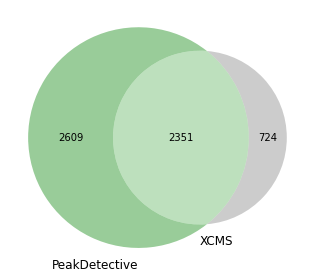

In [69]:
venn2([set(overlap[overlap["PeakDetective"] > 0.5].index.values),set(overlap[overlap["XCMS"] > 0.5].index.values)],set_labels=["PeakDetective","XCMS"],set_colors=["green","grey"])
plt.tight_layout()
plt.savefig(datadir + "venn_feats.png",dpi=300)

In [70]:
pd_only_feats = overlap[(overlap["PeakDetective"] > 0.5) & (overlap["XCMS"] < 0.5)].sort_values(by="mz").set_index("index")
pd_only_feats

,mz,rt,PeakDetective,XCMS
index,,,,
1,56.996561,0.665767,1,0
2,56.997973,0.665767,1,0
3,57.066443,0.965767,1,0
5,57.975586,1.765767,1,0
8,58.036287,6.065767,1,0
...,...,...,...,...
4925,1642.986905,1.165767,1,0
4930,1646.122731,0.865767,1,0
4942,1652.146361,0.965767,1,0


In [71]:
allPdFeats = overlap[overlap["PeakDetective"] > 0.5].sort_values(by="mz").set_index("index")
allPdFeats

,mz,rt,PeakDetective,XCMS
index,,,,
0,56.995481,0.665767,1,1
1,56.996561,0.665767,1,0
2,56.997973,0.665767,1,0
3,57.066443,0.965767,1,0
4,57.975586,1.665767,1,1
...,...,...,...,...
4955,1678.154011,0.865767,1,1
4956,1680.172695,0.865767,1,1
4957,1687.126589,6.865767,1,0


In [72]:
pd_peak_list.backgroundSubtract(["lank"],["QC"],3)
pd_peak_list.peakList

1815 background features found


,mz,rt,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML
2,56.997973,0.665767,3712.766605,4486.372245,2642.037913,3665.334071,3739.795206,3790.605392,3675.587585,2947.877723,3593.807648,3568.411782,4511.029516,3719.890257,3978.675981,3099.090295,1640.115258,383.797356,191.898678
4,57.975586,1.665767,194212.774283,201194.743525,201317.011225,127355.221900,116607.917261,183404.658988,146206.907108,181494.255758,247586.530361,187051.379157,208213.119646,223996.925381,234234.429419,160430.902646,314.364268,932.510203,516.677230
5,57.975586,1.765767,194212.774283,201194.743525,201317.011225,127355.221900,116607.917261,183404.658988,146206.907108,181494.255758,247586.530361,187051.379157,208213.119646,223996.925381,234234.429419,160430.902646,314.364268,932.510203,516.677230
6,58.006469,1.765767,1504.643566,551.930844,1345.519940,1695.709379,1438.422740,1367.361229,1699.501152,733.361072,1839.446364,1348.497043,1696.549434,367.596962,628.961280,1349.036831,58.787861,58.787861,117.575722
7,58.006469,4.265767,4311.809931,2876.303751,3778.612834,4620.895915,3592.266177,4020.789103,3644.631230,2526.820328,4821.113872,3356.513201,3723.569409,4003.901990,4190.715974,4703.114562,303.321464,281.037632,263.662661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,1672.131810,0.865767,2541.694498,1889.773651,2544.169244,1437.152281,1488.529402,933.603383,3761.060401,1669.485729,2122.577972,2334.233929,1777.672834,1820.707003,1906.666617,2287.947153,861.295601,447.262104,223.631052
4953,1674.127493,0.865767,2735.497740,1302.789497,1278.150902,124.755685,1335.515242,741.185559,4939.983704,764.084104,2230.601105,3138.600650,1734.817444,2608.156199,1605.440179,1739.387245,124.755685,249.511369,789.746062
4955,1678.154011,0.865767,1001.391535,1315.117256,1884.850403,614.269259,1168.443648,2011.199022,2343.581246,1430.137185,543.859893,1473.228141,1612.486279,1260.597059,1580.594980,1622.368510,334.003749,661.134987,167.001875
4956,1680.172695,0.865767,916.862353,1680.158197,1903.729704,1790.028374,1402.953471,4598.724482,1719.520104,825.505441,642.579311,939.003438,304.546306,1254.602161,1745.313839,1178.540086,270.492363,304.984257,169.288696


In [73]:
backgroundFeats = list(set(allPdFeats.index.values) - set(pd_peak_list.peakList.index.values))
print(backgroundFeats[:5],len(backgroundFeats))

[0, 1, 3, 8, 11] 1815


In [74]:
research_samps = [x for x in pd_peak_list.sampleCols if "QC" not in x and "lank" not in x]
research_samps

['D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML',
 'D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML']

In [75]:
if __name__ == "__main__":
    pd_peak_list.removeRedundancy(0.5,0.5,"negative",10,ms1ppm,sampleCols=research_samps)


grouping peaks |██████████████████████████████████████████████████| 100.0% 1724 peak groups found
running mz.unity |██████████████████████████████████████████████████| 100.0% 
1986 redundant features found


In [76]:
degenFeats = list(set(allPdFeats.index.values) - set(pd_peak_list.peakList.index.values) - set(backgroundFeats))
print(degenFeats[:5],len(degenFeats))

[9, 10, 91, 93, 103] 1986


In [77]:
pd_peak_list.logTransform(pdCols)

In [78]:
pd_feats = pd_peak_list.peakList[pd_peak_list.sampleCols]
pd_feats = pd_feats.rename(mapper={x:x.replace(datadir,"") for x in pd_feats.columns.values},axis=1)
pd_feats

,QC-P pool-4_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-2_6540.mzML,P H-514_6540.mzML,P H-507_6540.mzML,P H-488_6540.mzML,P H-487_6540.mzML,P H-482_6540.mzML,P H-480_6540.mzML,P H-476_6540.mzML,P H-472_6540.mzML,P H-471_6540.mzML,P H-469 -2 _6540.mzML,P H-464_6540.mzML,blank-3_6540.mzML,blank-2_6540.mzML,blank-1_6540.mzML
2,11.858279,12.131334,11.367435,11.839729,11.868744,11.888213,11.843759,11.525461,11.811297,11.801066,12.139241,11.861044,11.958073,11.597629,10.679581,8.584201,7.584201
4,17.567279,17.618233,17.619110,16.958499,16.831306,17.484671,17.157652,17.469564,17.917573,17.513075,17.667701,17.773119,17.837594,17.291593,8.296293,9.864976,9.013119
5,17.567279,17.618233,17.619110,16.958499,16.831306,17.484671,17.157652,17.469564,17.917573,17.513075,17.667701,17.773119,17.837594,17.291593,8.296293,9.864976,9.013119
6,10.555206,9.108344,10.393948,10.727673,10.490272,10.417179,10.730896,9.518380,10.845056,10.397137,10.728388,8.521981,9.296827,10.397714,5.877446,5.877446,6.877446
7,12.074078,11.490000,11.883641,12.173957,11.810679,11.973263,11.831557,11.303107,12.235151,11.712748,11.862471,11.967191,12.032981,12.199401,8.244704,8.134620,8.042549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,10.590818,10.680599,10.394750,8.291551,9.421879,8.664668,8.832033,10.454175,11.298437,11.269240,10.489216,10.362752,11.284022,10.235694,8.515946,9.045993,8.554074
4952,11.311575,10.883998,11.312979,10.488997,10.539672,9.866666,11.876924,10.705188,11.051602,11.188733,10.795774,10.830283,10.896837,11.159838,9.750365,8.804977,7.804977
4953,11.417588,10.347388,10.319842,6.962962,10.383181,9.533691,12.270291,9.577588,11.123217,11.615906,10.760568,11.348815,10.648753,10.764363,6.962962,7.962962,9.625245
4955,9.967790,10.360976,10.880234,9.262727,10.190372,10.973840,11.194499,10.481938,9.087091,10.524765,10.655071,10.299891,10.626252,10.663886,8.383720,9.368801,7.383720


In [79]:
pd_feats = pd_peak_list.peakList[pd_peak_list.sampleCols]
pd_feats = pd_feats.rename(mapper={x:x.replace(datadir,"") for x in pd_feats.columns.values},axis=1)
pd_feats

,QC-P pool-4_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-2_6540.mzML,P H-514_6540.mzML,P H-507_6540.mzML,P H-488_6540.mzML,P H-487_6540.mzML,P H-482_6540.mzML,P H-480_6540.mzML,P H-476_6540.mzML,P H-472_6540.mzML,P H-471_6540.mzML,P H-469 -2 _6540.mzML,P H-464_6540.mzML,blank-3_6540.mzML,blank-2_6540.mzML,blank-1_6540.mzML
2,11.858279,12.131334,11.367435,11.839729,11.868744,11.888213,11.843759,11.525461,11.811297,11.801066,12.139241,11.861044,11.958073,11.597629,10.679581,8.584201,7.584201
4,17.567279,17.618233,17.619110,16.958499,16.831306,17.484671,17.157652,17.469564,17.917573,17.513075,17.667701,17.773119,17.837594,17.291593,8.296293,9.864976,9.013119
5,17.567279,17.618233,17.619110,16.958499,16.831306,17.484671,17.157652,17.469564,17.917573,17.513075,17.667701,17.773119,17.837594,17.291593,8.296293,9.864976,9.013119
6,10.555206,9.108344,10.393948,10.727673,10.490272,10.417179,10.730896,9.518380,10.845056,10.397137,10.728388,8.521981,9.296827,10.397714,5.877446,5.877446,6.877446
7,12.074078,11.490000,11.883641,12.173957,11.810679,11.973263,11.831557,11.303107,12.235151,11.712748,11.862471,11.967191,12.032981,12.199401,8.244704,8.134620,8.042549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,10.590818,10.680599,10.394750,8.291551,9.421879,8.664668,8.832033,10.454175,11.298437,11.269240,10.489216,10.362752,11.284022,10.235694,8.515946,9.045993,8.554074
4952,11.311575,10.883998,11.312979,10.488997,10.539672,9.866666,11.876924,10.705188,11.051602,11.188733,10.795774,10.830283,10.896837,11.159838,9.750365,8.804977,7.804977
4953,11.417588,10.347388,10.319842,6.962962,10.383181,9.533691,12.270291,9.577588,11.123217,11.615906,10.760568,11.348815,10.648753,10.764363,6.962962,7.962962,9.625245
4955,9.967790,10.360976,10.880234,9.262727,10.190372,10.973840,11.194499,10.481938,9.087091,10.524765,10.655071,10.299891,10.626252,10.663886,8.383720,9.368801,7.383720


In [80]:
sampleInfo = pd.read_csv(datadir + "../../config/metadata.csv",index_col=0)
sampleInfo

,group,lipid_pos,lipid_neg,polar_neg,polar_pos
sample_name,,,,,
blank1,blank,pblank-2_lipids.mzML,blank-2_lipids.mzML,blank-1_6540.mzML,pblank-1_6540.mzML
blank2,blank,pblank-3_lipids.mzML,blank-3_lipids.mzML,blank-2_6540.mzML,pblank-2_6540.mzML
blank3,blank,pblank-4_lipids.mzML,blank-4_lipids.mzML,blank-3_6540.mzML,pblank-3_6540.mzML
P H-464,Mock,pP H-464_lipids.mzML,P H-464_lipids.mzML,P H-464_6540.mzML,pP H-464_6540.mzML
P H-469 -2,SARS-CoV-2,pP H-469 -2 _lipids.mzML,P H-469 -2 _lipids.mzML,P H-469 -2 _6540.mzML,pP H-469 -2 _6540.mzML
P H-471,SARS-CoV-2,pP H-471_lipids.mzML,P H-471_lipids.mzML,P H-471_6540.mzML,pP H-471_6540.mzML
P H-472,Mock,pP H-472_lipids.mzML,P H-472_lipids.mzML,P H-472_6540.mzML,pP H-472_6540.mzML
P H-476,Mock,pP H-476_lipids.mzML,P H-476_lipids.mzML,P H-476_6540.mzML,pP H-476_6540.mzML
P H-480,Mock,pP H-480_lipids.mzML,P H-480_lipids.mzML,P H-480_6540.mzML,pP H-480_6540.mzML


In [81]:
groups = ["Mock","SARS-CoV-2"]
samples = [sampleInfo[sampleInfo["group"] == group]["polar_neg"].values for group in groups]
names = [[group+"_"+str(rep) for rep in range(len(samp))] for group,samp in zip(groups,samples)] 

In [82]:
sigMetsPD = []
for index,row in pd_feats.iterrows():
    p,stat = stats.ttest_ind(row[samples[0]],row[samples[1]],equal_var=False)
    if p <  0.05/len(pd_feats) and np.abs(np.mean(row[samples[1]])-np.mean(row[samples[0]])) > 0.5:
        sigMetsPD.append(index)
pd_feats.loc[sigMetsPD,:]

,QC-P pool-4_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-2_6540.mzML,P H-514_6540.mzML,P H-507_6540.mzML,P H-488_6540.mzML,P H-487_6540.mzML,P H-482_6540.mzML,P H-480_6540.mzML,P H-476_6540.mzML,P H-472_6540.mzML,P H-471_6540.mzML,P H-469 -2 _6540.mzML,P H-464_6540.mzML,blank-3_6540.mzML,blank-2_6540.mzML,blank-1_6540.mzML
100,10.620319,11.135690,10.339899,8.022661,8.022661,11.167068,9.851905,11.178617,9.621489,10.391027,8.022661,11.909582,11.935951,10.484952,9.022661,8.022661,8.022661
104,10.839434,11.159401,11.878315,11.428119,9.500134,11.262542,9.793049,8.311392,10.715915,11.941663,11.614395,11.686119,11.985253,11.541616,8.354547,8.201060,8.726154
125,11.774293,11.827969,12.081463,11.547763,11.694508,11.761065,12.312699,11.852725,11.114111,10.602902,11.637709,12.130099,12.333370,11.692932,8.604261,7.378554,8.378554
134,12.588685,11.607165,12.093620,12.264820,9.699708,11.775705,13.531529,12.448535,12.896914,11.456174,11.251711,12.777610,10.772844,12.305811,8.178538,8.047591,9.462795
193,12.468696,12.388518,12.488680,11.451799,11.619021,12.956597,12.603962,11.945969,11.818794,12.300909,11.059266,12.905890,11.998742,11.732053,9.332204,9.010950,9.362772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,12.472161,12.501342,12.057350,13.536417,13.161924,12.946743,13.390275,11.930711,8.802104,9.734406,10.061446,12.367515,13.172327,11.441649,9.475093,7.802104,9.044978
4724,11.601947,11.354177,11.243368,12.516430,12.474967,12.349909,12.609198,11.112108,8.192905,8.148006,8.907767,11.821420,12.609077,10.494463,8.196433,9.412800,8.548421
4758,9.862034,10.689920,11.080649,11.640214,10.065190,12.037032,6.949023,10.130213,8.326879,8.952684,6.949023,10.129084,11.912720,9.650171,6.949023,7.949023,8.410964
4937,11.447604,11.658285,11.968762,11.164748,11.738868,11.834222,12.169516,11.654725,7.910653,11.561571,11.020156,11.622420,11.884805,11.799817,7.910653,8.910653,7.910653


In [83]:
nonSigMets = [x for x in pd_feats.index.values if x not in sigMetsPD]

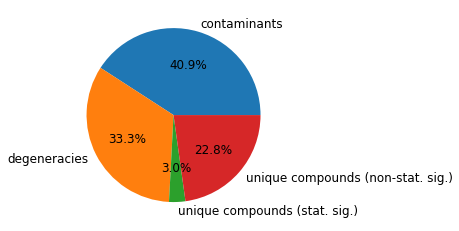

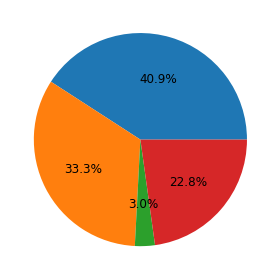

In [84]:
plt.pie([len([x for x in backgroundFeats if x in pd_only_feats.index.values]),
         len([x for x in degenFeats if x in pd_only_feats.index.values]),
         len([x for x in sigMetsPD if x in pd_only_feats.index.values]),
         len([x for x in nonSigMets if x in pd_only_feats.index.values])],
        labels=["contaminants","degeneracies","unique compounds (stat. sig.)","unique compounds (non-stat. sig.)"],autopct='%1.1f%%',textprops={"fontsize":12})#,colors=["yellow","grey","green","blue"])

plt.figure()
plt.pie([len([x for x in backgroundFeats if x in pd_only_feats.index.values]),
         len([x for x in degenFeats if x in pd_only_feats.index.values]),
         len([x for x in sigMetsPD if x in pd_only_feats.index.values]),
         len([x for x in nonSigMets if x in pd_only_feats.index.values])],
        autopct='%1.1f%%',textprops={"fontsize":12})#,colors=["yellow","grey","green","blue"])
plt.tight_layout()
plt.savefig(datadir + "pie_chart.png",dpi=300)

In [51]:
# research_samps = [x for x in det.sampleCols if "QC" not in x and "lank" not in x]
# research_samps

In [187]:
# det.imputeRowMin(det.sampleCols)

In [188]:
# det.backgroundSubtract(["lank"],["QC"],3)
# det.peakList

In [189]:
# if __name__ == "__main__":
#     det.removeRedundancy(0.9,0.5,"negative",10,ms1ppm,sampleCols=research_samps)

In [190]:
# det.logTransform(det.sampleCols)

In [191]:
# xcms_peaks_filt = det.peakList[det.sampleCols]
# xcms_peaks_filt

In [209]:
# sigMetsXCMS = []
# for index,row in xcms_peaks_filt.iterrows():
#     p,stat = stats.ttest_ind(row[samples[0]],row[samples[1]],equal_var=False)
    
#     if p <  0.05 and np.abs(np.mean(row[samples[1]])-np.mean(row[samples[0]])) > 1.0:
#         sigMetsXCMS.append(index)
# xcms_peaks_filt.loc[sigMetsXCMS,:]

In [85]:
def plot_overlayedEIC(rawdatas,mz,rt_start,rt_end,resolution=60,smoothing=0,alpha=0.3,colors=None):
    ts = np.linspace(rt_start,rt_end,resolution)
    for x,data in enumerate(rawdatas):
        s = data.interpolate_data(mz,rt_start,rt_end)
        ints  = [np.max([x,0]) for x in s(ts)]
        if colors is None:
            plt.plot(ts,ints,alpha=alpha)
        else:
            plt.plot(ts,ints,alpha=alpha,color=colors[x])

In [86]:
tmpRawData = []
colors = []
for samps,color in zip(samples,["red","blue"]):
    for x in samps:
        for y in raw_data:
            if x in y.filename:
                tmpRawData.append(y)
                colors.append(color)
                print(x,y.filename)

P H-464_6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML
P H-472_6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML
P H-476_6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML
P H-480_6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML
P H-482_6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML
P H-507_6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML
P H-469 -2 _6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML
P H-471_6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML
P H-487_6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML
P H-488_6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML
P H-514_6540.mzML D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML


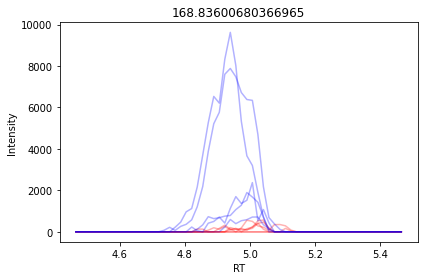

In [99]:
ind = rd.choice([x for x in sigMetsPD if x in pd_only_feats.index.values])
mz = pd_peak_list.peakList.at[ind,"mz"]
rt = pd_peak_list.peakList.at[ind,"rt"]
rt_start = rt-0.5
rt_end = rt+0.5
plot_overlayedEIC(tmpRawData,mz,rt_start,rt_end,resolution=60,alpha=0.3,colors=colors)
plt.title(mz)
plt.xlabel("RT")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig(datadir + "example_pd_sig_feat.png",dpi=300)

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


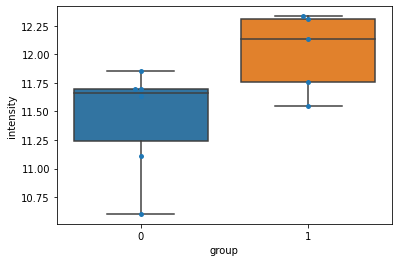

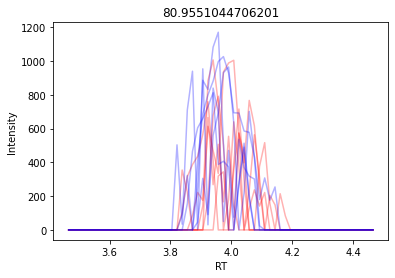

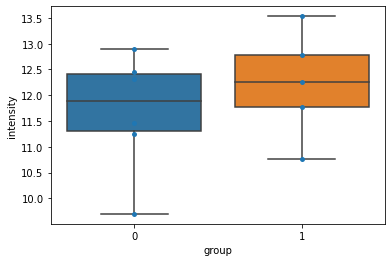

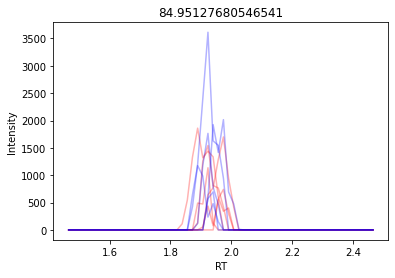

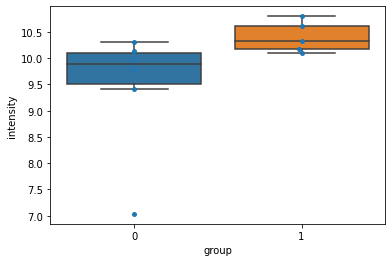

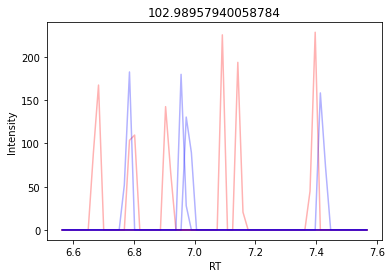

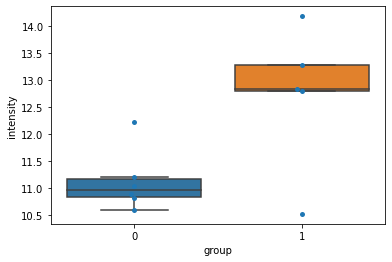

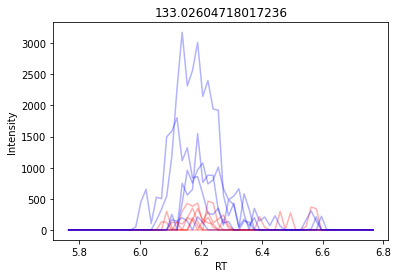

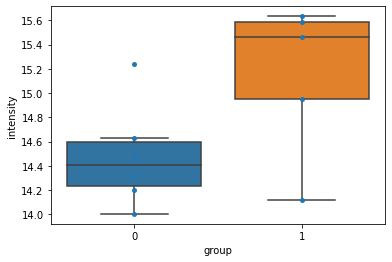

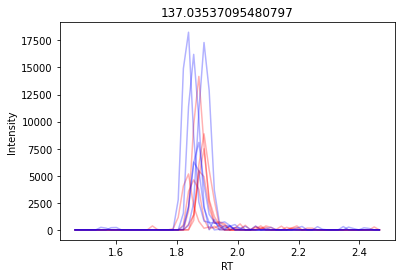

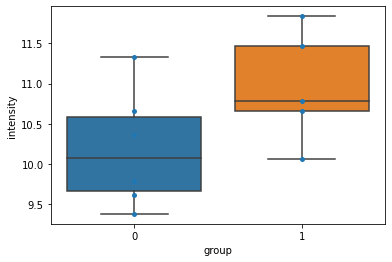

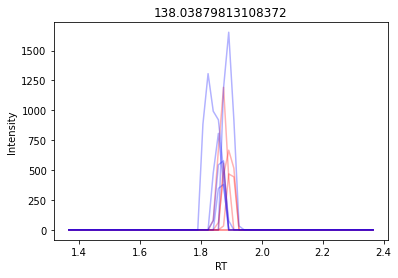

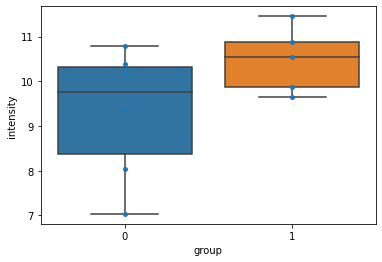

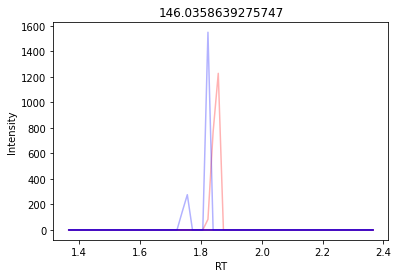

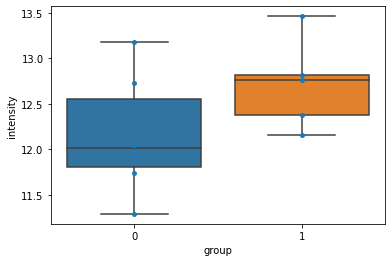

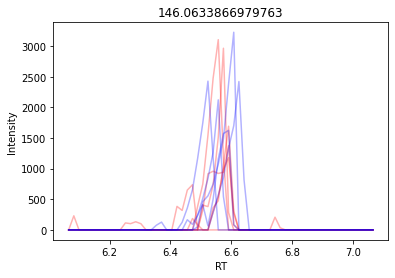

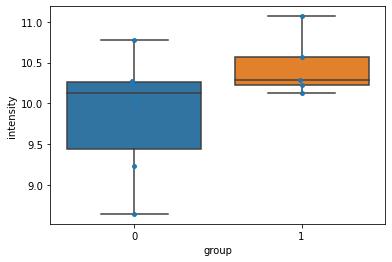

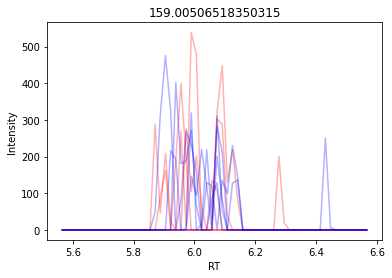

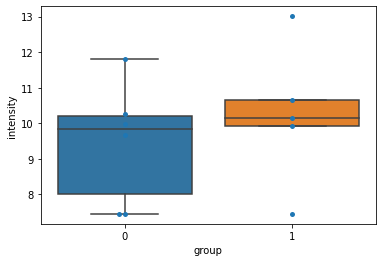

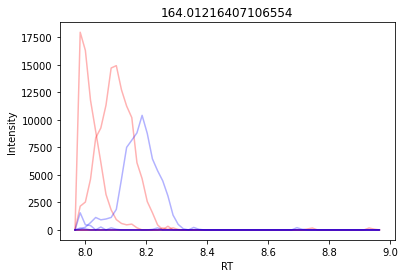

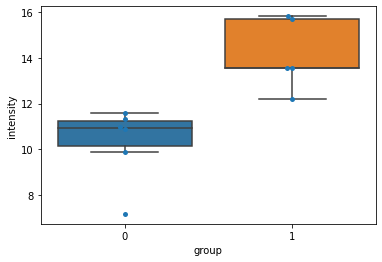

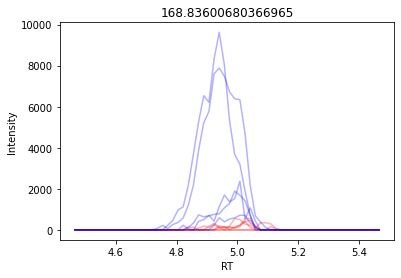

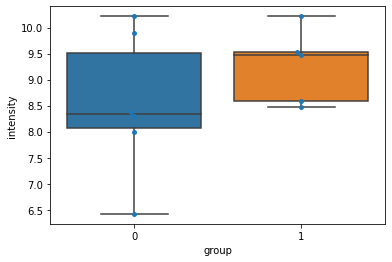

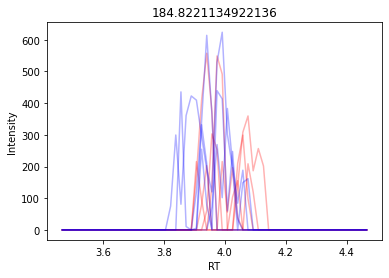

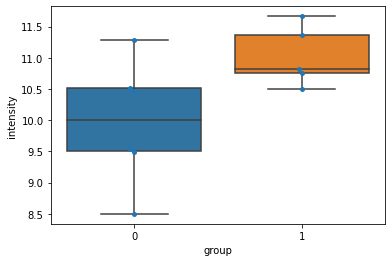

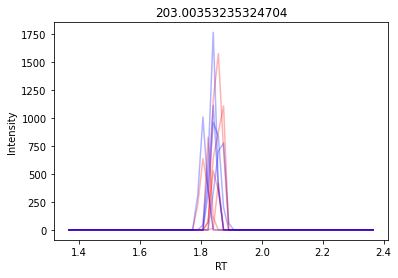

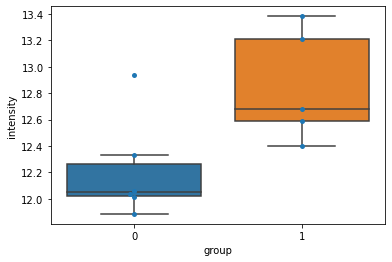

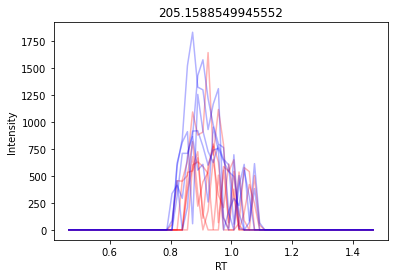

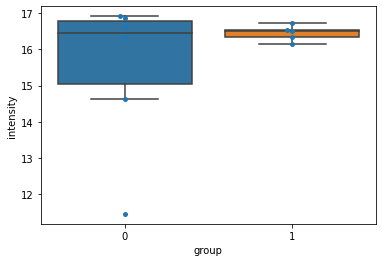

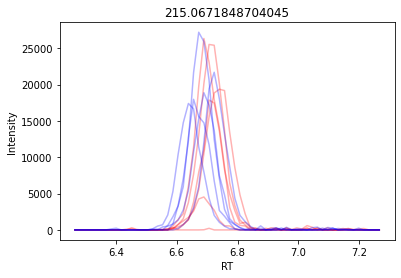

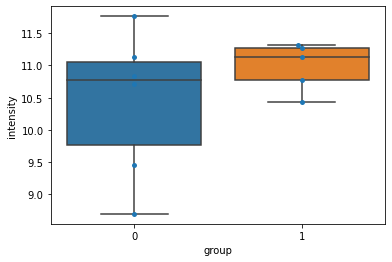

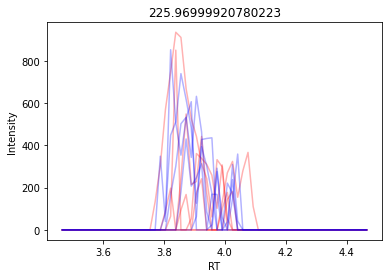

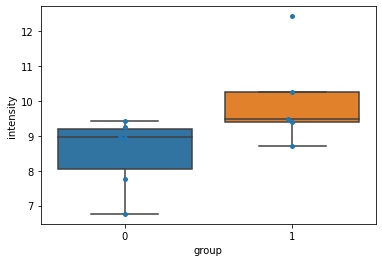

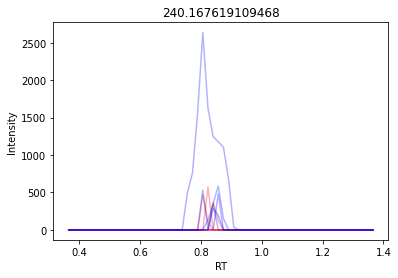

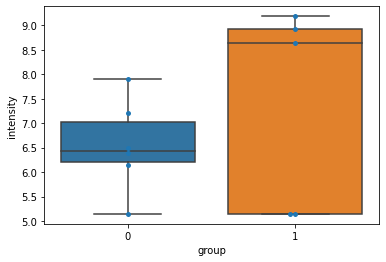

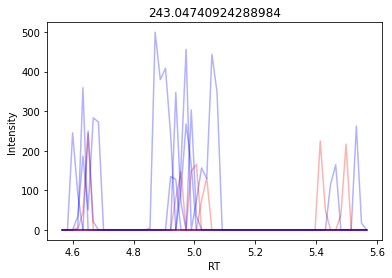

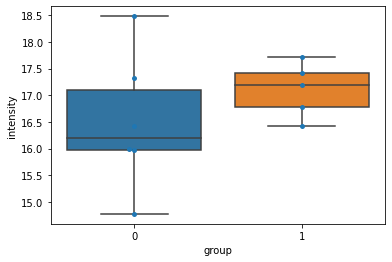

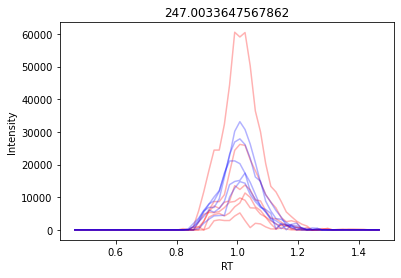

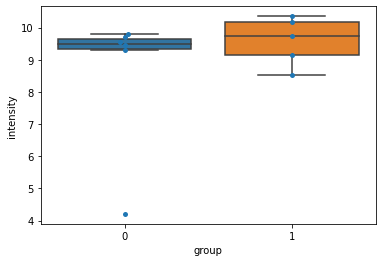

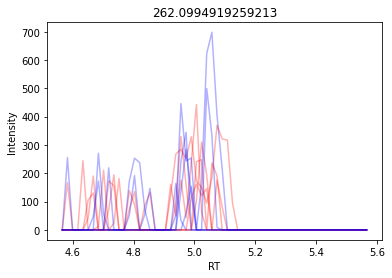

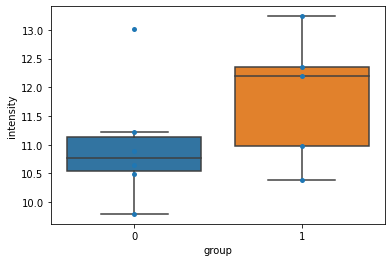

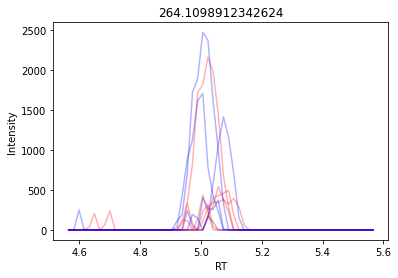

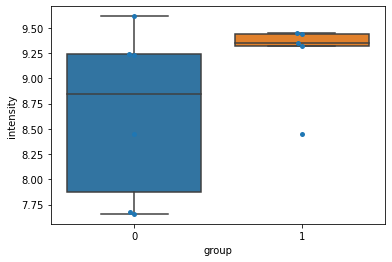

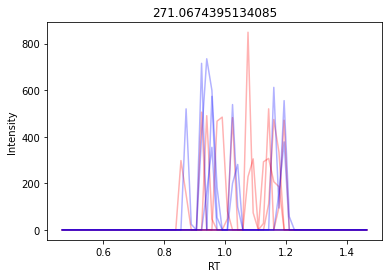

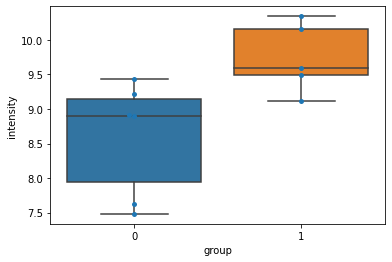

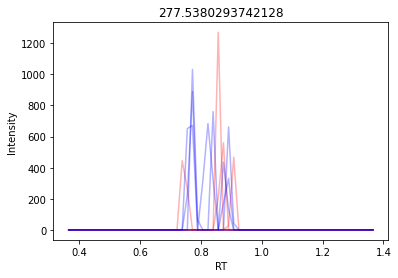

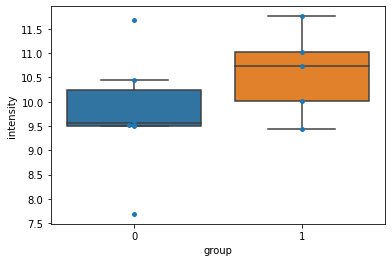

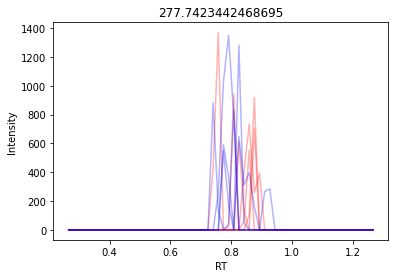

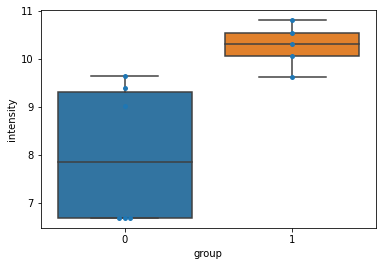

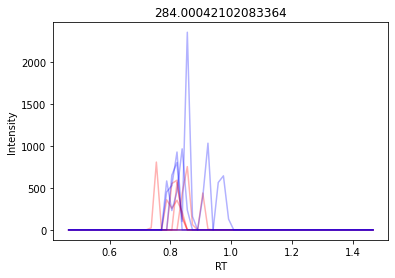

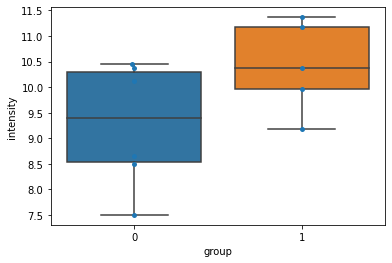

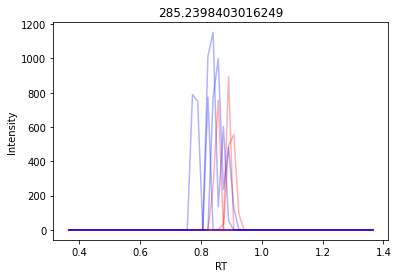

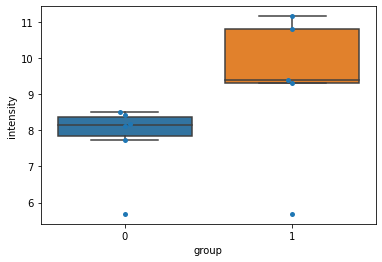

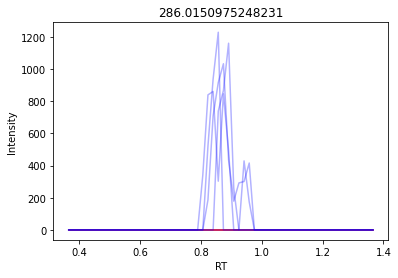

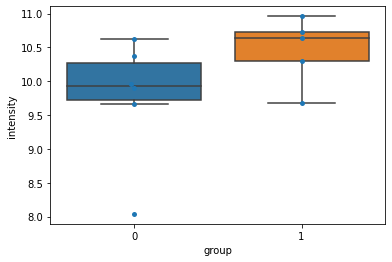

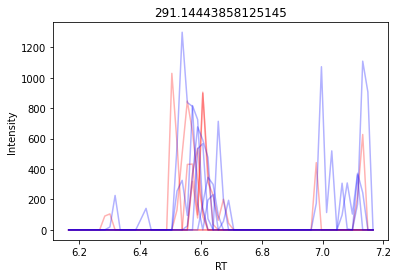

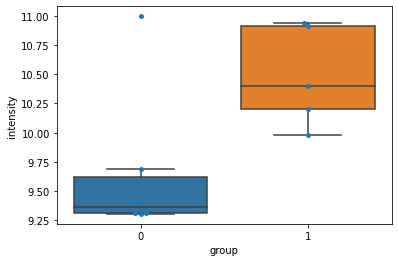

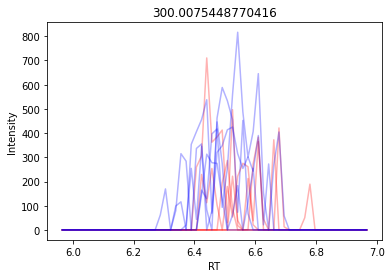

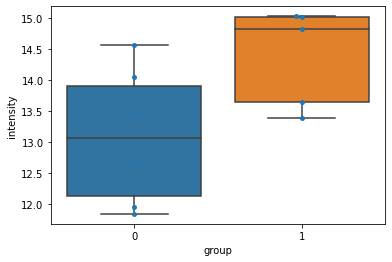

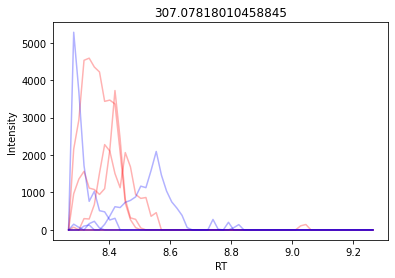

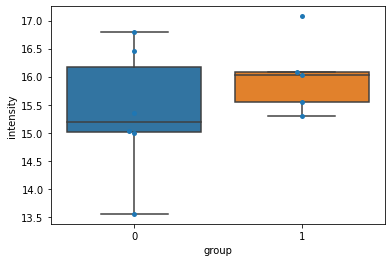

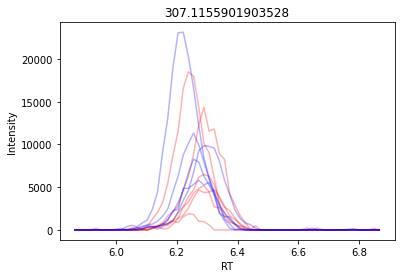

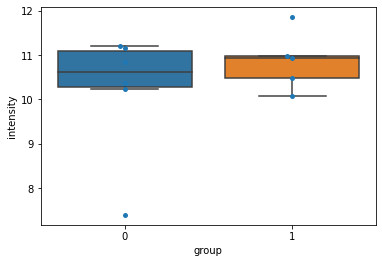

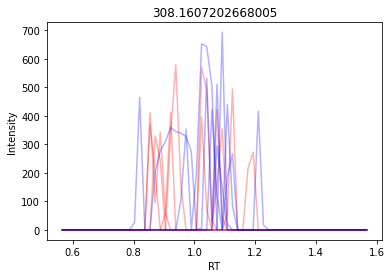

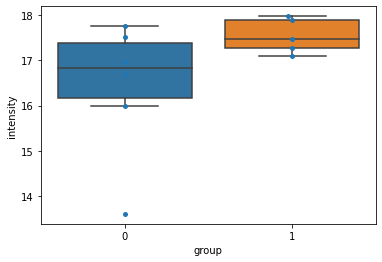

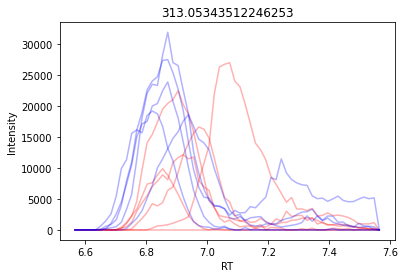

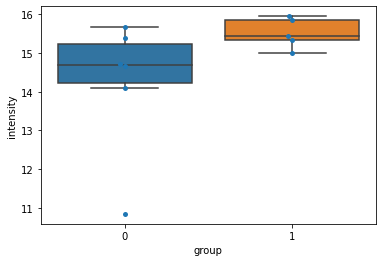

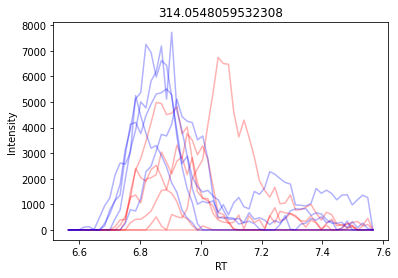

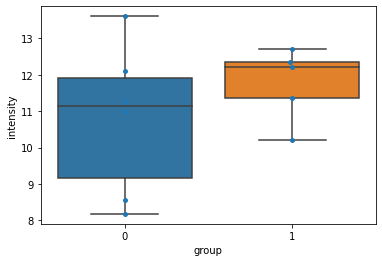

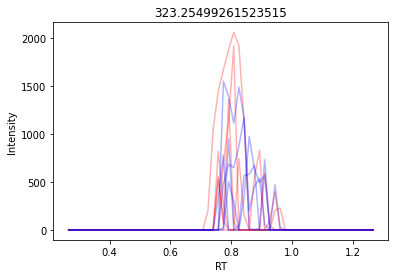

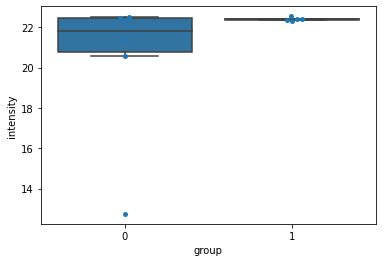

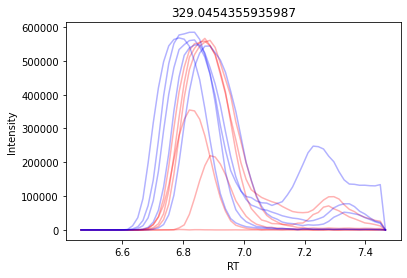

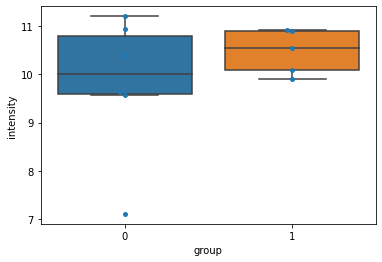

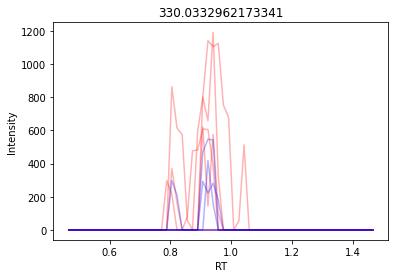

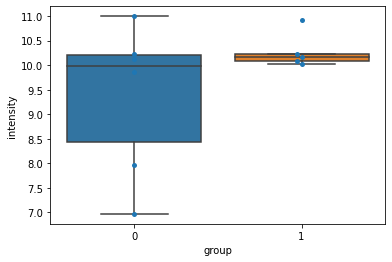

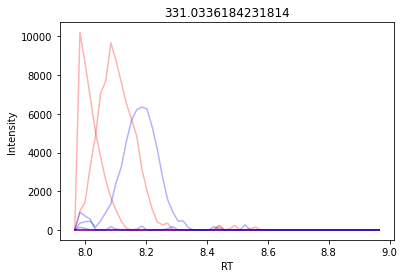

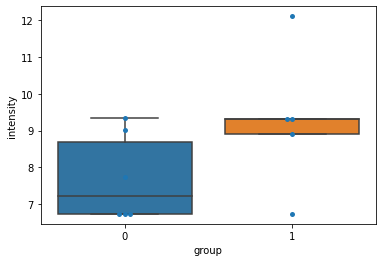

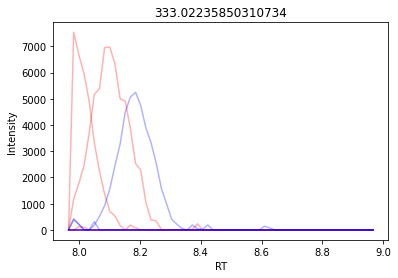

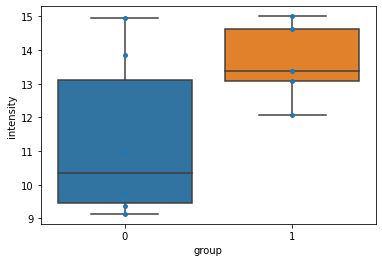

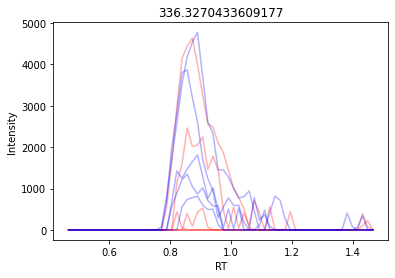

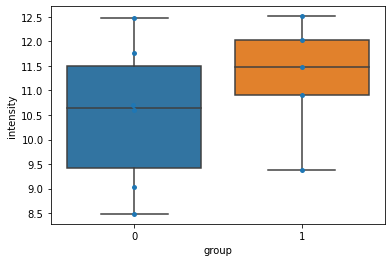

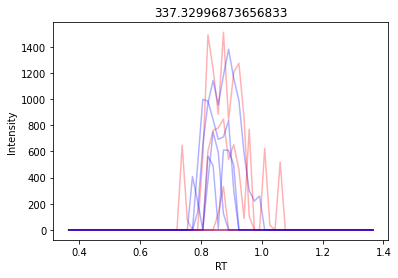

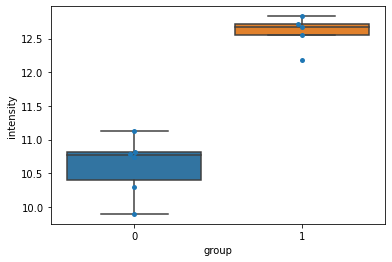

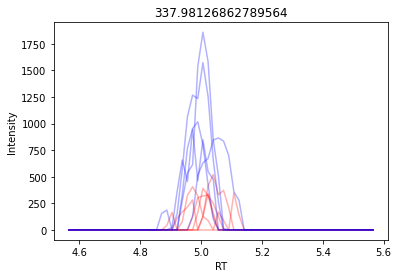

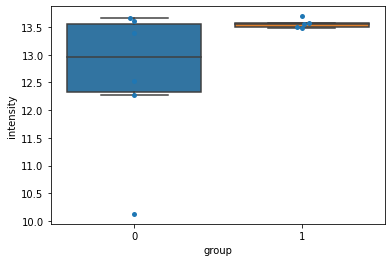

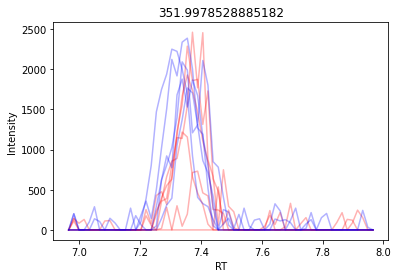

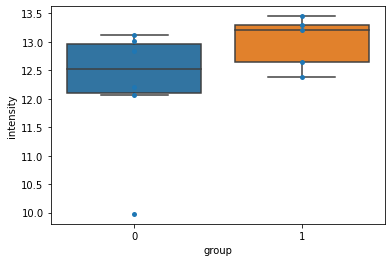

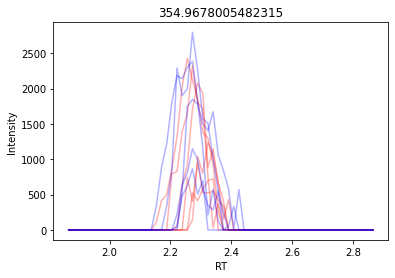

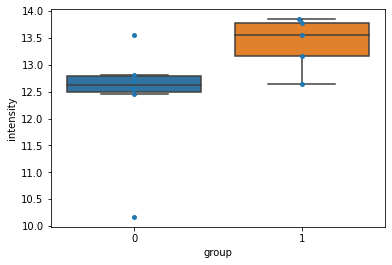

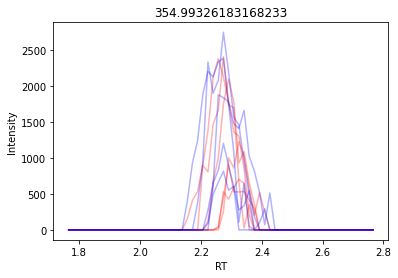

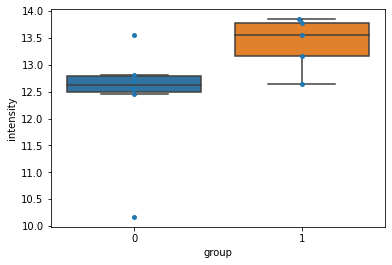

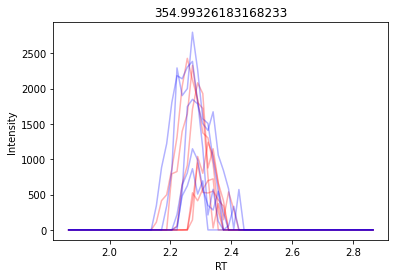

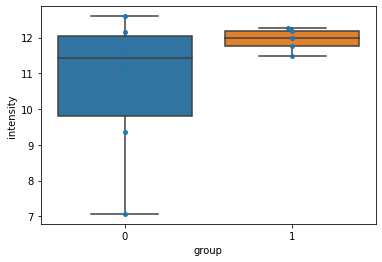

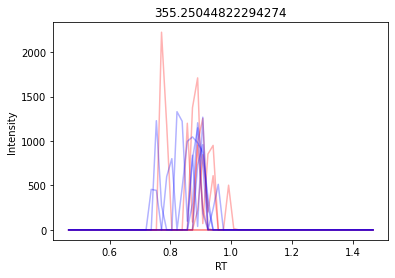

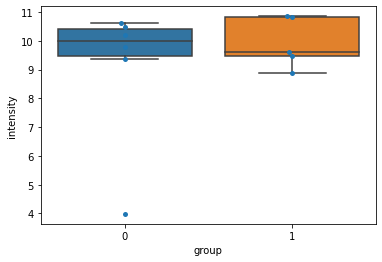

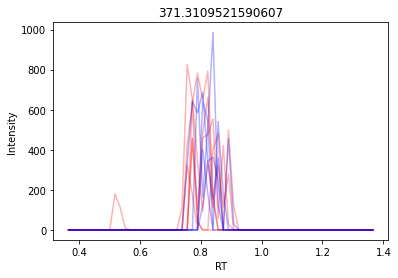

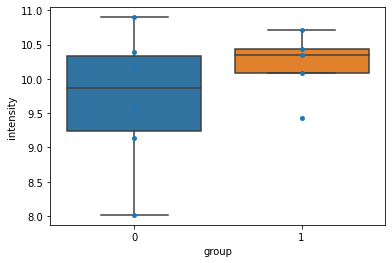

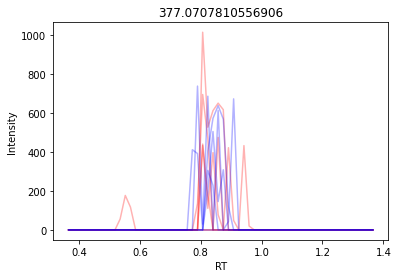

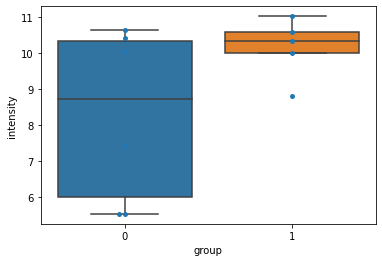

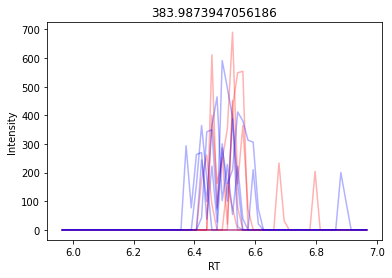

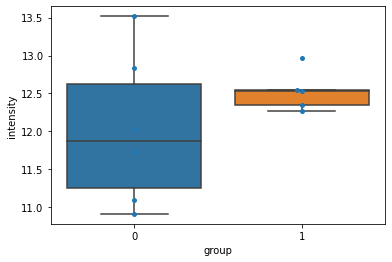

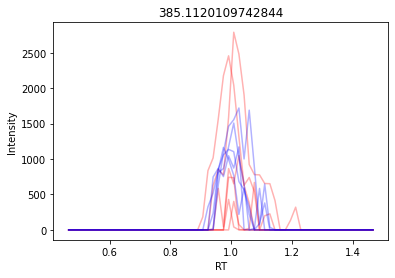

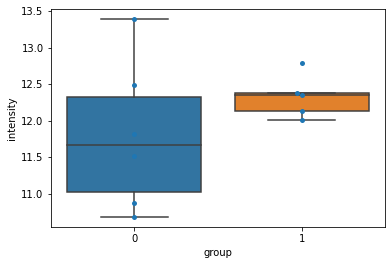

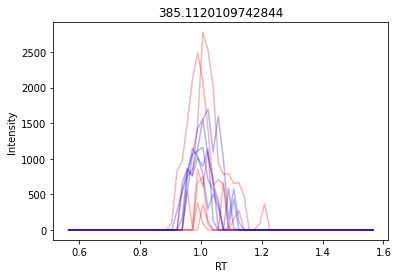

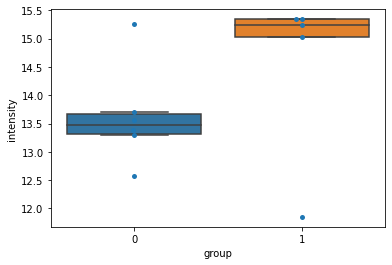

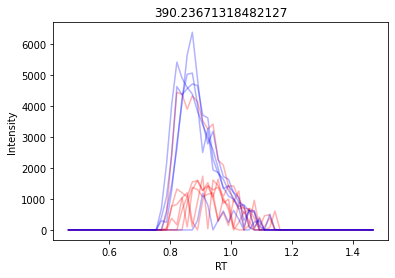

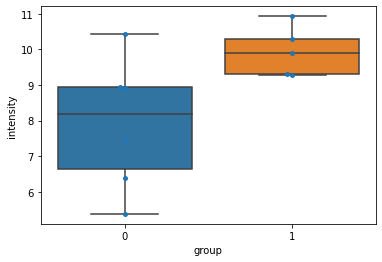

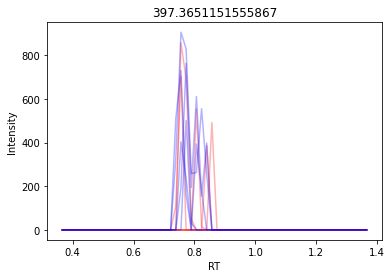

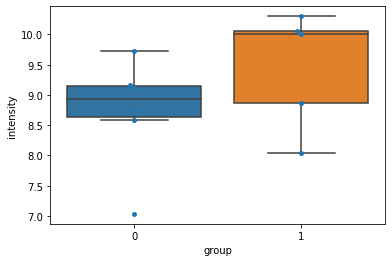

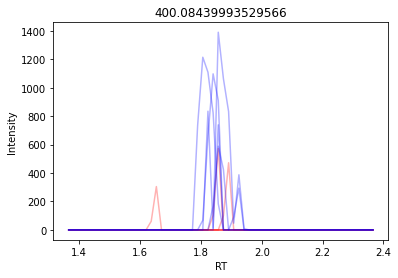

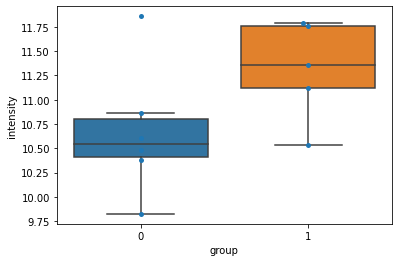

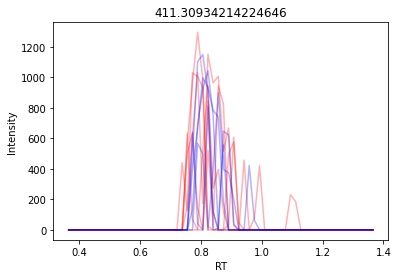

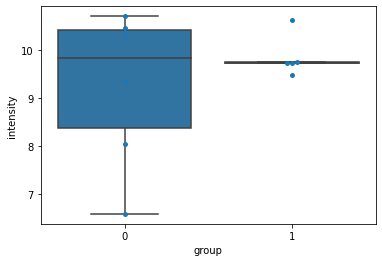

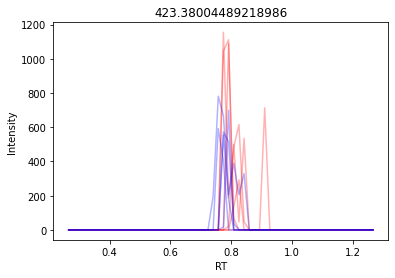

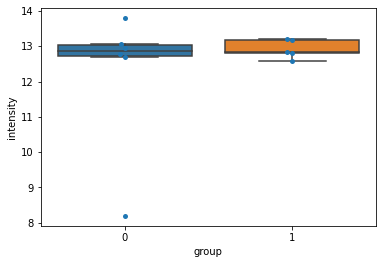

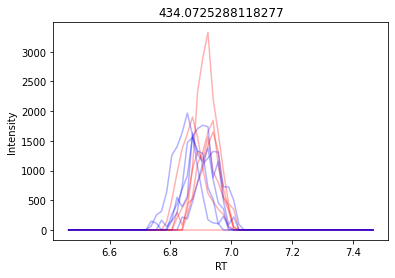

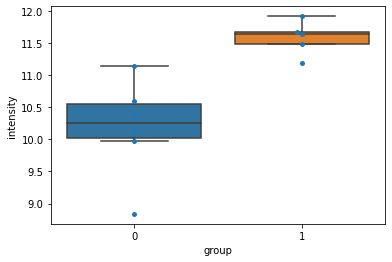

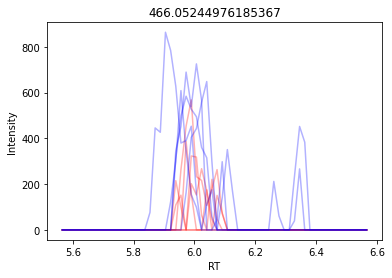

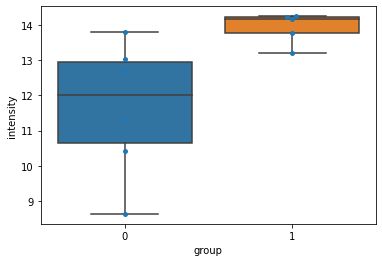

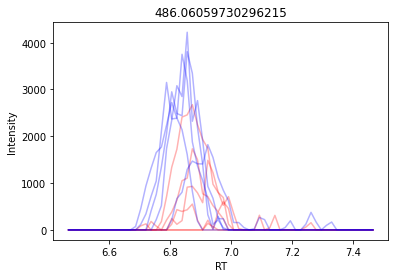

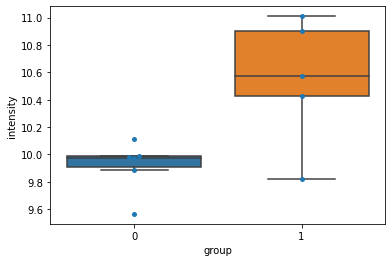

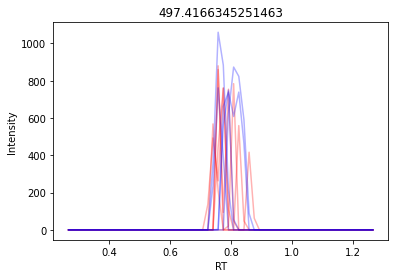

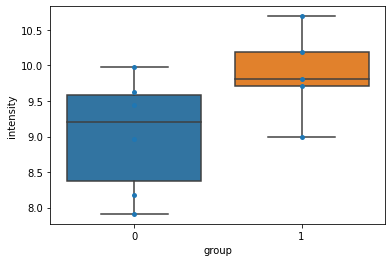

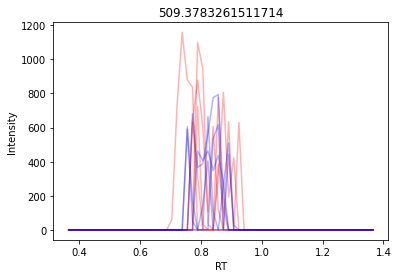

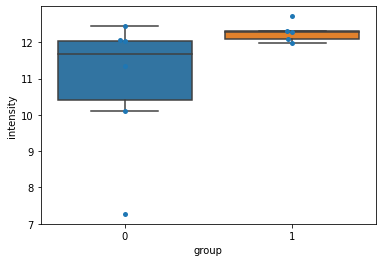

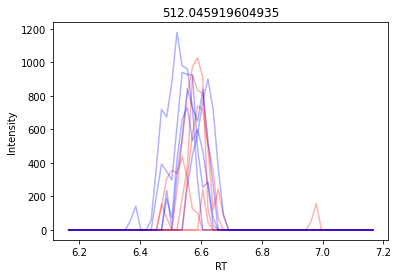

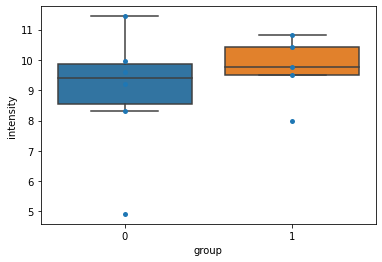

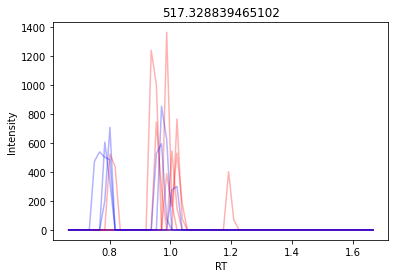

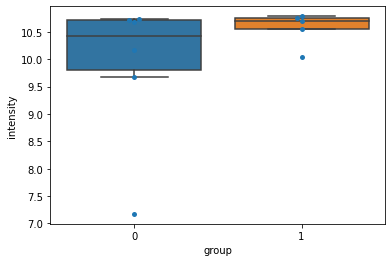

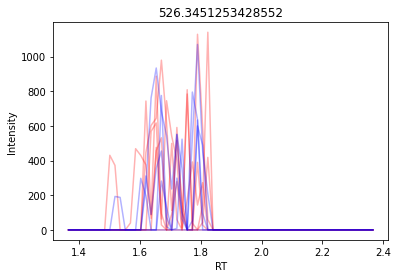

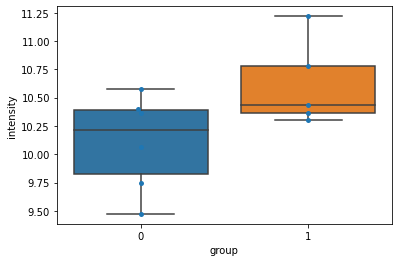

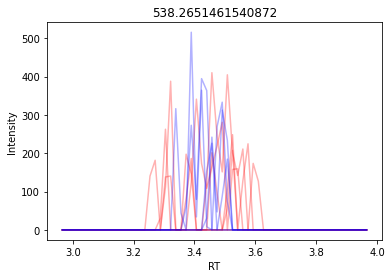

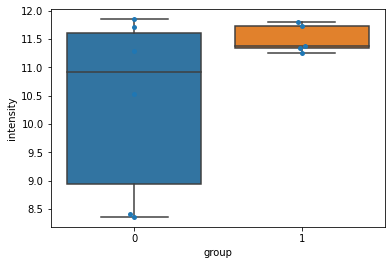

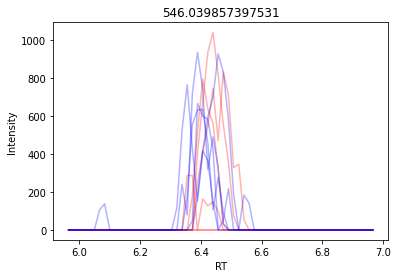

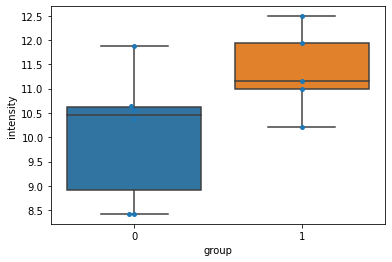

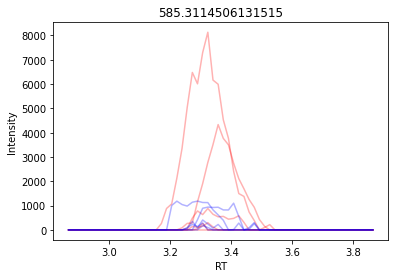

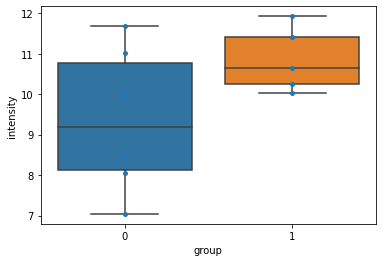

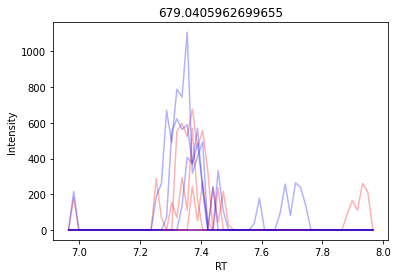

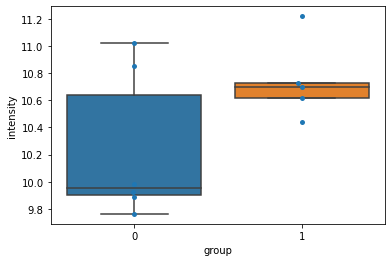

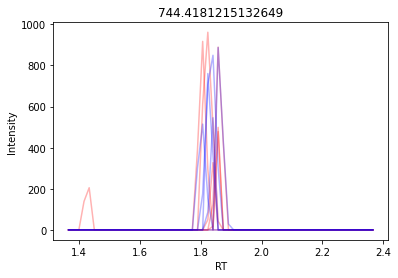

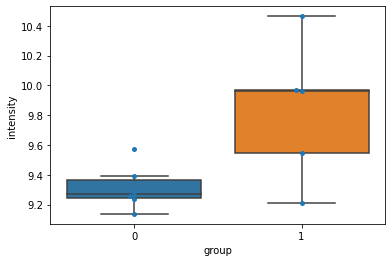

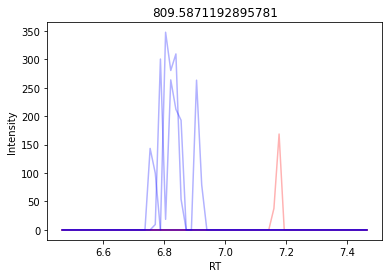

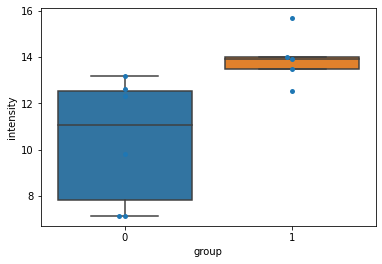

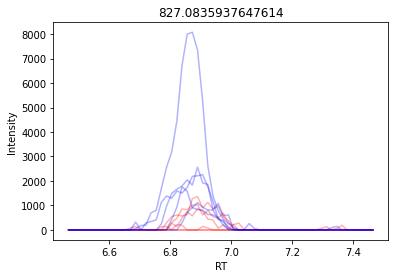

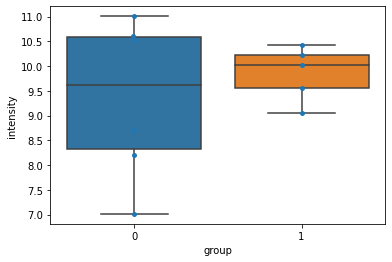

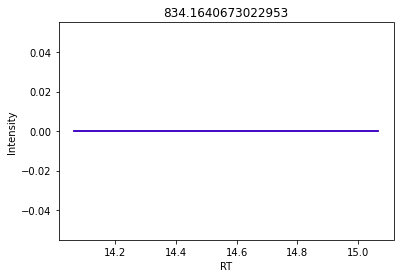

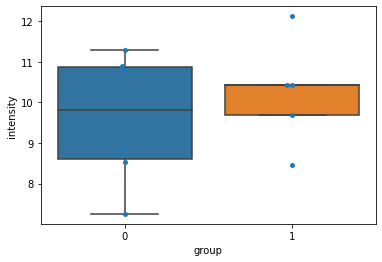

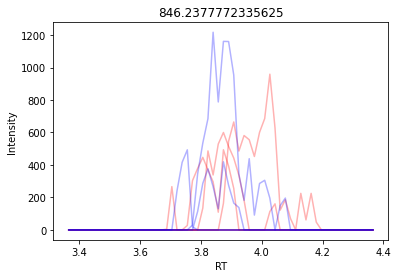

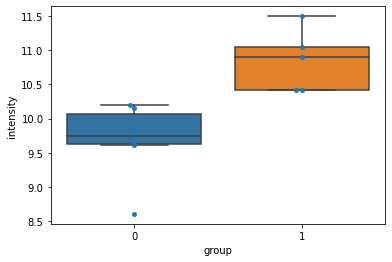

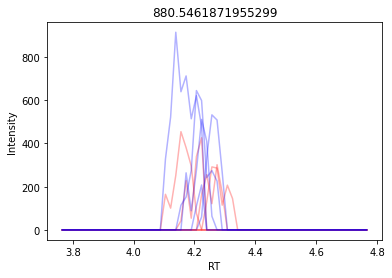

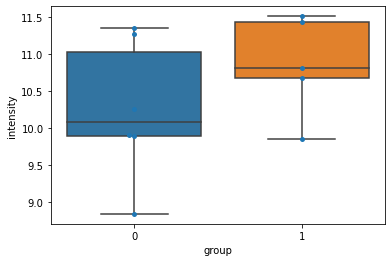

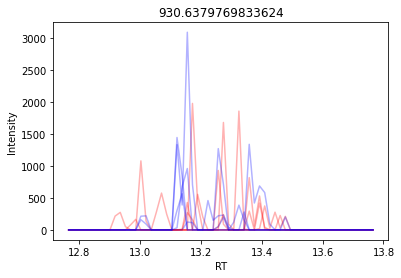

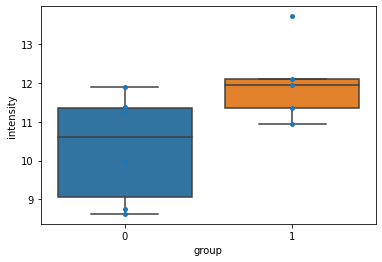

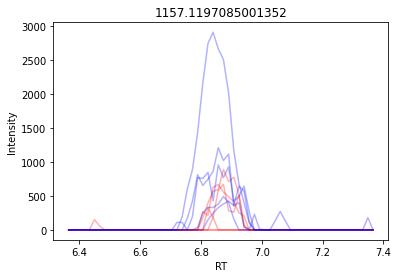

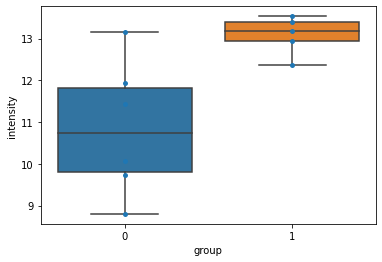

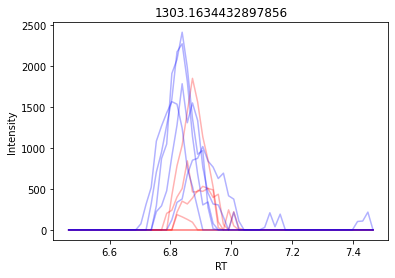

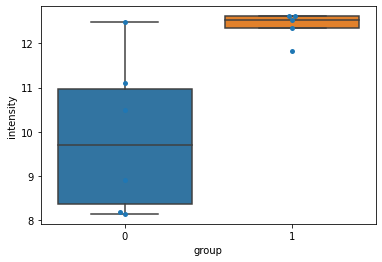

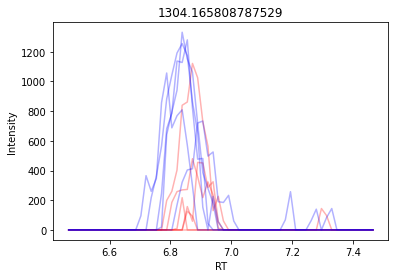

In [116]:
for index,row in pd_feats.loc[[x for x in sigMetsPD if x in pd_only_feats.index.values],:].iterrows():
    plt_df = {}
    for x,samp in enumerate(samples):
        for s in samp:
            plt_df[len(plt_df)] = {"sample":s,"intensity":row[s],"group":x}
    plt_df = pd.DataFrame.from_dict(plt_df,orient="index")
    plt.figure()
    sb.boxplot(data=plt_df,x="group",y="intensity",fliersize=0)
    sb.swarmplot(data=plt_df,x="group",y="intensity")

    mz = pd_peak_list.peakList.at[index,"mz"]
    rt = pd_peak_list.peakList.at[index,"rt"]
    rt_start = rt-0.5
    rt_end = rt+0.5
    plt.figure()
    plot_overlayedEIC(tmpRawData,mz,rt_start,rt_end,resolution=60,alpha=0.3,colors=colors)
    plt.title(mz)
    plt.xlabel("RT")
    plt.ylabel("Intensity")    
        
    

In [109]:
np.power(2,11)

2048